In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing openssh-server
!apt-get install openssh-server -qq > /dev/null

# Starting our server
!service ssh start

 * Starting OpenBSD Secure Shell server sshd
   ...done.


In [ ]:
# Creating a new rsa key pair with empty password
!ssh-keygen -t rsa -P "" -f ~/.ssh/id_rsa

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:0XyE/tNkJoEp4NV64xB69X7oHgHk0xUMJ+GE2Ld0TsU root@8da35f9291c5
The key's randomart image is:
+---[RSA 3072]----+
|      ...+.=*+++.|
|     . .+=O=+++ E|
|      ...**++*   |
|      . +.+++ =  |
|       .S+ +.B   |
|          . =.o  |
|           ..o   |
|            ..   |
|           ..    |
+----[SHA256]-----+


In [ ]:
# Copying the public key we just generated to authorised keys
!cat $HOME/.ssh/id_rsa.pub>>$HOME/.ssh/authorized_keys

# Changing the permissions on the key
# Hint: Check "man chmod" for information on this command and remember, changing permissions
# so be careful with this command.
!chmod 0600 ~/.ssh/authorized_keys

In [ ]:
# Conneting with our local machine (essentially, we are just connecting to our own machine "as if" it is a remote server.)
# pptime will just tell us how long our system has been running.
!ssh -o StrictHostKeyChecking=no localhost uptime

 19:21:52 up 2 min,  0 users,  load average: 3.01, 1.76, 0.72


In [ ]:
import os

In [ ]:
# Installing Hadoop and configuring JAVA_HOME:
# Downloading Hadoop
# Upzipping
# Copying hadoop into our /usr/local folder
# Removing the unused original copy
# Remove the compressed (zip) file, we're not using it anymore.
# Adding a variable called "JAVA_HOME" to hadoop's environment script which tells it where Java is on our system.

!if [ ! -d /usr/local/hadoop-3.3.6/ ]; then \
wget https://dlcdn.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz; \
tar -xzf hadoop-3.3.6.tar.gz; \
cp -r hadoop-3.3.6/ /usr/local/; \
rm -rf hadoop-3.3.6/; \
rm hadoop-3.3.6.tar.gz; \
echo "export JAVA_HOME=$(dirname $(dirname $(realpath $(which java))))" >> /usr/local/hadoop-3.3.6/etc/hadoop/hadoop-env.sh; \
fi

--2024-11-20 19:21:53--  https://dlcdn.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730107476 (696M) [application/x-gzip]
Saving to: ‘hadoop-3.3.6.tar.gz’

hadoop-3.3.6.tar.gz 100%[===================>] 696.28M   150MB/s    in 6.1s    

2024-11-20 19:21:59 (114 MB/s) - ‘hadoop-3.3.6.tar.gz’ saved [730107476/730107476]



In [ ]:
# Setting up some of our environmental variables:
# Here we add Hadoop's location to our path (in Python) and tell our system where hadoop is located.
os.environ['PATH'] = "/usr/local/hadoop-3.3.6/bin/:" + os.environ['PATH']
os.environ["HADOOP_HOME"] = "/usr/local/hadoop-3.3.6"

In [ ]:
# Here, we've uploaded lab4_config.sh to our Google drive , not that this path will depend on **YOUR** google drive.
# We are then copying this to our "content" folder.
# This does a lot of the annoying configuration for us.
!cp /content/drive/MyDrive/lab4_config.sh /content/
!cat lab4_config.sh

cp: cannot stat '/content/drive/MyDrive/lab4_config.sh': No such file or directory
cat: lab4_config.sh: No such file or directory


In [ ]:
# Running our config script
# Note: remember to check you have the correct filepath
!bash lab4_config.sh

bash: lab4_config.sh: No such file or directory


In [ ]:
!$HADOOP_HOME/bin/hdfs namenode -format


2024-11-20 19:22:28,762 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 8da35f9291c5/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 3.3.6
STARTUP_MSG:   classpath = /usr/local/hadoop-3.3.6/etc/hadoop:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/kerb-server-1.0.1.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/dnsjava-2.1.7.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/protobuf-java-2.5.0.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/commons-math3-3.1.1.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/netty-all-4.1.89.Final.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/jaxb-impl-2.2.3-1.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/commons-text-1.10.0.jar:/usr/local/hadoop-3.3.6/share/hadoop/common/lib/netty-transport-na

In [ ]:
# Creating our HDFS environment variables:
os.environ["HDFS_NAMENODE_USER"] = "root"
os.environ["HDFS_DATANODE_USER"] = "root"
os.environ["HDFS_SECONDARYNAMENODE_USER"] = "root"
os.environ["YARN_RESOURCEMANAGER_USER"] = "root"
os.environ["YARN_NODEMANAGER_USER"] = "root"

In [ ]:
# Launching hdfs daemons
!$HADOOP_HOME/sbin/start-dfs.sh

Starting namenodes on [8da35f9291c5]
8da35f9291c5: Warning: Permanently added '8da35f9291c5' (ED25519) to the list of known hosts.
Starting datanodes
Starting secondary namenodes [8da35f9291c5]


In [ ]:
!jps

1979 Jps


In [ ]:
# Launching our yarn daemons
# nohup causes a process to ignore a "hang-up" signal
!nohup $HADOOP_HOME/sbin/start-yarn.sh

nohup: ignoring input and appending output to 'nohup.out'


In [ ]:
# Listing the running daemons (i.e. programs doing some work in the background for us
# Note the NodeManager, and Resource Manager
# More info on JPS here: https://www.oreilly.com/library/view/apache-hadoop-3/9781788999830/81815d09-e275-44e2-88a8-4f63ab943b92.xhtml
!jps

2209 NodeManager
2100 ResourceManager
2325 Jps


In [ ]:
# Report the basic file system information and statistics to make sure everything is set up as it should be:
!$HADOOP_HOME/bin/hdfs dfsadmin -report

report: FileSystem file:/// is not an HDFS file system. The fs class is: org.apache.hadoop.fs.LocalFileSystem
Usage: hdfs dfsadmin [-report] [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]


In [ ]:
# Report the basic file system information and statistics to make sure everything is set up as it should be:
!$HADOOP_HOME/bin/hdfs dfsadmin -report

report: FileSystem file:/// is not an HDFS file system. The fs class is: org.apache.hadoop.fs.LocalFileSystem
Usage: hdfs dfsadmin [-report] [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]


In [ ]:
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar

An example program must be given as the first argument.
Valid program names are:
  aggregatewordcount: An Aggregate based map/reduce program that counts the words in the input files.
  aggregatewordhist: An Aggregate based map/reduce program that computes the histogram of the words in the input files.
  bbp: A map/reduce program that uses Bailey-Borwein-Plouffe to compute exact digits of Pi.
  dbcount: An example job that count the pageview counts from a database.
  distbbp: A map/reduce program that uses a BBP-type formula to compute exact bits of Pi.
  grep: A map/reduce program that counts the matches of a regex in the input.
  join: A job that effects a join over sorted, equally partitioned datasets
  multifilewc: A job that counts words from several files.
  pentomino: A map/reduce tile laying program to find solutions to pentomino problems.
  pi: A map/reduce program that estimates Pi using a quasi-Monte Carlo method.
  randomtextwriter: A map/reduce program that writes 10GB of r

In [ ]:
#for converting the files to utf -8 if required
# !iconv -f utf-8 -t utf-8 -c '/content/drive/MyDrive/hunger_data/SDG_BulkDownloads_E_All_Data_Normalized.csv' -o '/content/drive/MyDrive/hunger_data/SDG_BulkDownloads_E_All_Data_Normalized_cleaned.csv'

In [ ]:
#storing data into hdfs
!$HADOOP_HOME/bin/hdfs dfs -mkdir /data
!$HADOOP_HOME/bin/hdfs dfs -put /content/drive/MyDrive/hunger_data/FAOSTAT_data_en_11-15-2024.csv /data
!$HADOOP_HOME/bin/hdfs dfs -put /content/drive/MyDrive/hunger_data/2024.xlsx /data
!$HADOOP_HOME/bin/hdfs dfs -put /content/drive/MyDrive/hunger_data/hunger_index_interpolated.csv /data
!$HADOOP_HOME/bin/hdfs dfs -put /content/drive/MyDrive/hunger_data/SDG_BulkDownloads_E_All_Data_Normalized_cleaned.csv /data

In [ ]:
%%writefile mapper.py
#!/usr/bin/env python3
import sys
import csv

# Mapper Code
for line in sys.stdin:
    line = line.strip()
    # Use csv reader to parse CSV line
    csv_reader = csv.reader([line])
    for row in csv_reader:
        try:
            # Extract necessary fields
            area_code = row[0]
            area = row[2]  # Country
            item_code = row[3].split('-')[0] if (len(row[3])>0 and len(row[3].split('-'))>1) else row[3]  # Item Code
            item_code_sdg = row[4]  # Item Code SDG
            item = row[5]  # Item
            year = row[9]  # Year
            unit = row[10]  # Unit
            value = row[11]  # Value

            # Filter for specific item codes related to SDG 2
            sdg_item_codes = [
                24001,24003,24004,24005
            ]
            if int(item_code) in sdg_item_codes and value != "" and year!='' and int(year) and float(value):
                # Emit the key-value pair with area and year
                item = ''.join(item.split(' ')[1::])
                print(f"{year}\t{area_code}\t{area}\t{item_code}\t{item_code_sdg}\t{item}\t{value}\t{unit}")
            break;
        except (IndexError, ValueError):
            # Handle cases with missing columns or invalid data
            continue


Writing mapper.py


In [ ]:
#for testing the working of map
!cat '/content/drive/MyDrive/hunger_data/SDG_BulkDownloads_E_All_Data_Normalized_cleaned.csv' | python3 mapper.py

Streaming output truncated to the last 5000 lines.
2014	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-_T-_T	Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	307977.5	1000 No
2015	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-_T-_T	Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	281490.1	1000 No
2016	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-_T-_T	Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	251938	1000 No
2017	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-_T-_T	Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	255154.9	1000 No
2018	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-_T-_T	Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	331646.7	1000 No
2019	5306	Central Asia and Southern Asia	24004

In [ ]:
%%writefile reducer.py
#!/usr/bin/env python3
import sys
from collections import defaultdict

# Initialize dictionary to store aggregated values
data = defaultdict(list)

# Process input from mapper
for line in sys.stdin:
    line = line.strip()
    try:
        # Parse mapper output
        year, area_code, area, item_code, item_code_sdg, item,value, unit = line.split("\t")
        year = int(year)
        area_code = int(area_code)
        item_code = int(item_code)
        value = float(value)

        # Group by (area_code, item_code) and store year-value pairs
        key = (area_code, item_code)
        data[key].append((year, area, item_code_sdg,item, value, unit))
    except ValueError:
        # Skip any malformed lines
        continue

# Function to calculate growth rate
def calculate_growth_rate(values):
    values.sort(key=lambda x: x[0])  # Sort by year
    if len(values) > 1:
        start_value = values[0][4]  # First year's value
        end_value = values[-1][4]  # Last year's value
        return ((end_value - start_value) / start_value) * 100 if start_value != 0 else 0
    return 0

# Output aggregated results
for key, values in data.items():
    area_code, item_code = key

    # Calculate average
    avg_value = sum(value[4] for value in values) / len(values)

    # Calculate growth rate
    growth_rate = calculate_growth_rate(values)

    # Output all records for this group with the calculated average and growth rate
    for record in values:
        year, area, item_code_sdg,item, value, unit = record
        print(f"{year}\t{area_code}\t{area}\t{item_code}\t{item_code_sdg}\t{item}\t{value}\t{unit}\t{avg_value:.2f}\t{growth_rate:.2f}")


Writing reducer.py


In [ ]:
#for testing the working of reducer
!cat '/content/drive/MyDrive/hunger_data/SDG_BulkDownloads_E_All_Data_Normalized_cleaned.csv' | python3 mapper.py | python reducer.py

Streaming output truncated to the last 5000 lines.
2022	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-_T-_T	Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	411545.8	1000 No	179854.22	314.60
2023	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-F-Y_GE15	Numberofseverelyfoodinsecurepeople(female)(15yearsoldandover)	152821.2	1000 No	179854.22	314.60
2023	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-F-Y_GE15	Numberofseverelyfoodinsecurepeople(female)(15yearsoldandover)	143075.2	1000 No	179854.22	314.60
2023	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-F-Y_GE15	Numberofseverelyfoodinsecurepeople(female)(15yearsoldandover)	162567.2	1000 No	179854.22	314.60
2023	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)	132957.9	1000 No	179854.22	314.60
2023	5306	Central Asia and Southern Asia	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofsevere

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -rm -r /output/
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -input /data/SDG_BulkDownloads_E_All_Data_Normalized_cleaned.csv \
    -output /output \
    -file '/content/mapper.py' \
    -file '/content/reducer.py' \
    -mapper "python mapper.py" \
    -reducer "python reducer.py"

rm: `/output/': No such file or directory
2024-11-20 19:24:21,723 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper.py, /content/reducer.py] [] /tmp/streamjob394397823858456809.jar tmpDir=null
2024-11-20 19:24:23,428 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-11-20 19:24:23,843 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-11-20 19:24:23,844 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-11-20 19:24:23,893 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-11-20 19:24:24,378 INFO mapred.FileInputFormat: Total input files to process : 1
2024-11-20 19:24:24,440 INFO mapreduce.JobSubmitter: number of splits:3
2024-11-20 19:24:25,037 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local664371133_0001
2024-11-20 19:24:25,041 INFO mapreduce.JobSubmitter: Executing with tokens: []

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /output/part-00000

Streaming output truncated to the last 5000 lines.
2022	249	Yemen	24005	'AG_PRD_FIESMSN-_T-_T	Numberofmoderatelyorseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)	23410.6	1000 No	9088.14	480.56
2016	117	Republic of Korea	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)	111.9	1000 No	275.77	183.74
2016	117	Republic of Korea	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)	175.3	1000 No	275.77	183.74
2017	117	Republic of Korea	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)	214.3	1000 No	275.77	183.74
2017	117	Republic of Korea	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)	143.1	1000 No	275.77	183.74
2018	117	Republic of Korea	24004	'AG_PRD_FIESSN-M-Y_GE15	Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)	198.9	1000 No	275.77	183.74
2018	117	Republic of Korea	24004	'AG_PRD_F

In [ ]:
!pip install pyspark

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, corr
from pyspark.sql.types import FloatType
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Start Spark session
spark = SparkSession.builder.appName("HungerAnalysisProject").getOrCreate()

In [ ]:
# Read the data with tab as the delimiter
df = spark.read.csv("/output/part-00000", header=False, sep="\t")

# Rename the columns for clarity
df = df.toDF("year", "area_code", "area","item_code","item_code_sdg","item","value","unit","avg_value","growth_rate")

In [ ]:
df.head(5)

[Row(year='2000', area_code='5100', area='Africa', item_code='24001', item_code_sdg="'SN_ITK_DEFCN", item='Numberofundernourishedpeople', value='187.6', unit='million No', avg_value='202.96', growth_rate='59.06'),
 Row(year='2001', area_code='5100', area='Africa', item_code='24001', item_code_sdg="'SN_ITK_DEFCN", item='Numberofundernourishedpeople', value='186.4', unit='million No', avg_value='202.96', growth_rate='59.06'),
 Row(year='2002', area_code='5100', area='Africa', item_code='24001', item_code_sdg="'SN_ITK_DEFCN", item='Numberofundernourishedpeople', value='187.6', unit='million No', avg_value='202.96', growth_rate='59.06'),
 Row(year='2003', area_code='5100', area='Africa', item_code='24001', item_code_sdg="'SN_ITK_DEFCN", item='Numberofundernourishedpeople', value='190.0', unit='million No', avg_value='202.96', growth_rate='59.06'),
 Row(year='2004', area_code='5100', area='Africa', item_code='24001', item_code_sdg="'SN_ITK_DEFCN", item='Numberofundernourishedpeople', value=

In [ ]:
dff = df.toPandas()
dff['item'].value_counts()
# dff[dff['item']=='Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)(nobreakdownbyurbanisation)'].head(1)

item
Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)(nobreakdownbyurbanisation)    4062
Prevalenceofseverefoodinsecurity(male)(15yearsoldandover)(nobreakdownbyurbanisation)                                        4056
Prevalenceofseverefoodinsecurity(female)(15yearsoldandover)(nobreakdownbyurbanisation)                                      4050
Numberofmoderatelyorseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)                 3981
Numberofmoderatelyorseverelyfoodinsecurepeople(female)(15yearsoldandover)                                                   3818
Numberofmoderatelyorseverelyfoodinsecurepeople(male)(15yearsoldandover)                                                     3760
Numberofseverelyfoodinsecurepeople(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)                             3377
Numberofundernourishedpeople                                                                                                3023
Numberofseverelyfoodinsecurepeople(male)(15yearsoldandover)                                                                 2959
Numberofseverelyfoodinsecurepeople(female)(15yearsoldandover)                                                               2939
Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(15yearsoldandover)(rural)                                      252
Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(15yearsoldandover)(townandsemi-densearea)                      252
Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(15yearsoldandover)(urban)                                      252
Name: count, dtype: int64

### Prevalence of severe foodinsecurity

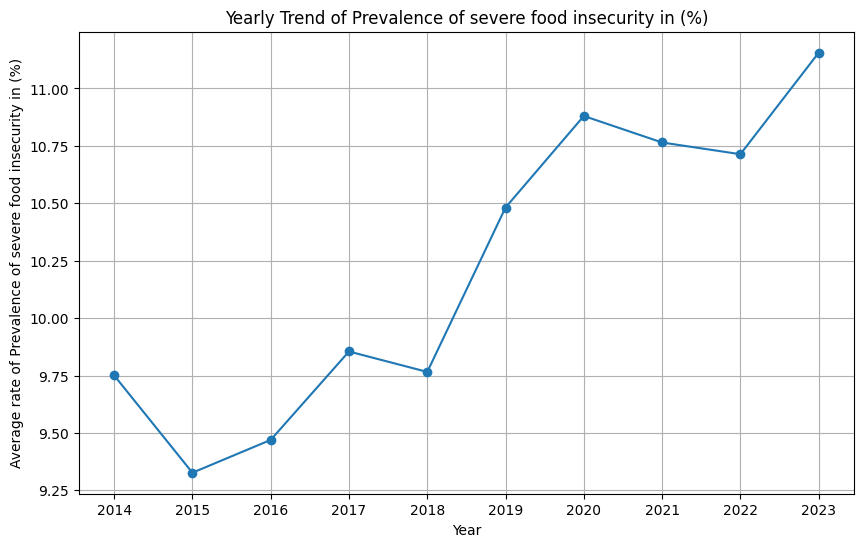

In [ ]:
#Yearly Trends for Indicators
from pyspark.sql.functions import avg
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and calculate the average value
yearly_trend = df[df['item']=='Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)(nobreakdownbyurbanisation)'].groupBy("year").agg(avg("avg_value").alias("avg_value")).orderBy("year")

# Convert to Pandas for visualization
yearly_trend_pd = yearly_trend.toPandas()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend_pd['year'], yearly_trend_pd['avg_value'], marker='o')
plt.title("Yearly Trend of Prevalence of severe food insecurity in (%)")
plt.xlabel("Year")
plt.ylabel("Average rate of Prevalence of severe food insecurity in (%)")
plt.grid(True)
plt.show()


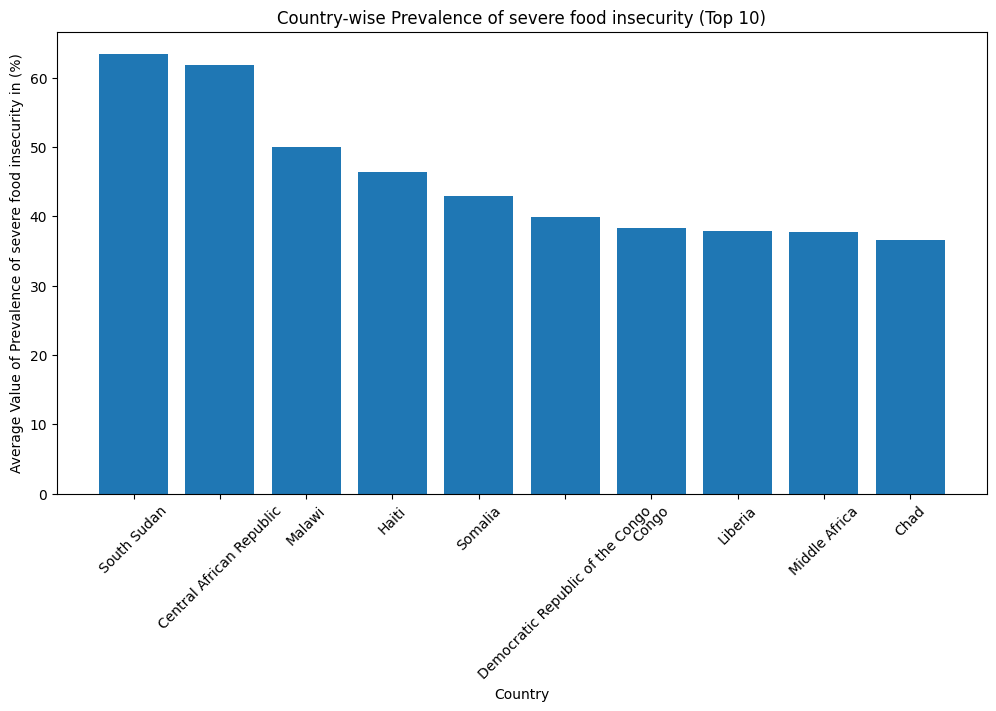

In [ ]:
#Country-wise Comparison
# Group by area and calculate the average value
country_trend = df[df['item']=='Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)(nobreakdownbyurbanisation)'].groupBy("area").agg(avg("avg_value").alias("avg_value")).orderBy("avg_value", ascending=False)

# Convert to Pandas for visualization
country_trend_pd = country_trend.limit(10).toPandas()  # Top 10 countries

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.bar(country_trend_pd['area'], country_trend_pd['avg_value'])
plt.title("Country-wise Prevalence of severe food insecurity (Top 10)")
plt.xlabel("Country")
plt.ylabel("Average Value of Prevalence of severe food insecurity in (%)")
plt.xticks(rotation=45)
plt.show()


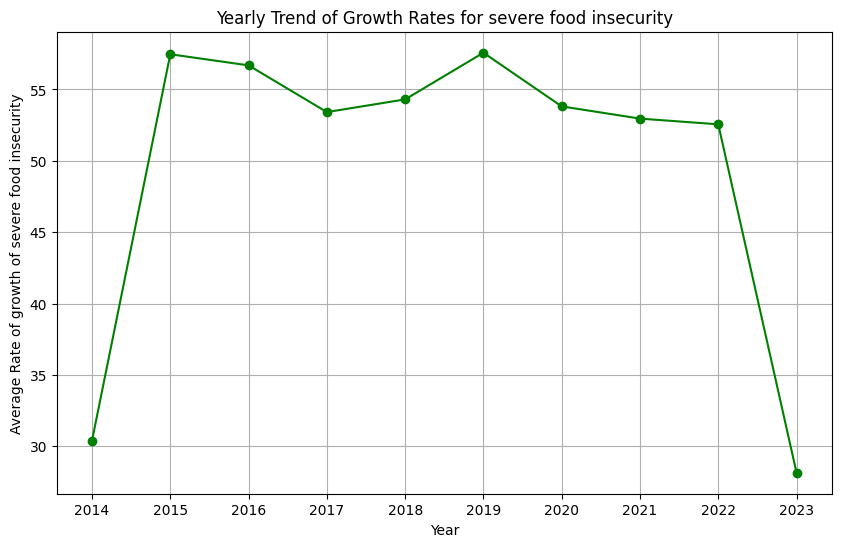

In [ ]:
#Growth Rate Trends for Indicators
# Group by year and calculate average growth rate
growth_trend = df[df['item']=='Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)(nobreakdownbyurbanisation)'].groupBy("year").agg(avg("growth_rate").alias("avg_growth_rate")).orderBy("year")

# Convert to Pandas for visualization
growth_trend_pd = growth_trend.toPandas()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(growth_trend_pd['year'], growth_trend_pd['avg_growth_rate'], marker='o', color='green')
plt.title("Yearly Trend of Growth Rates for severe food insecurity")
plt.xlabel("Year")
plt.ylabel("Average Rate of growth of severe food insecurity")
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Filter for the required factor and convert to Pandas DataFrame
geo_data = (
    df.filter(df["item"] == "Prevalenceofseverefoodinsecurity(bothsexesornobreakdownbysex)(allagerangesornobreakdownbyage)(nobreakdownbyurbanisation)")
    .select("area", "year", "value")
    .toPandas()
)

# Ensure 'value' is numeric
geo_data["value"] = pd.to_numeric(geo_data["value"], errors="coerce")

# Drop rows with NaN values
geo_data = geo_data.dropna(subset=["value"])

# Aggregate the data to handle duplicates (if any)
geo_data = geo_data.groupby(["area", "year"], as_index=False).agg({"value": "mean"})

# Create the choropleth map with a dropdown to select the year
fig = px.choropleth(
    geo_data,
    locations="area",  # The column with country names
    locationmode="country names",  # Match country names to map
    color="value",  # The column for the values to be visualized
    hover_name="area",  # Display country name on hover
    animation_frame="year",  # Animate across years
    title="Prevalence of Severe Food Insecurity Across Countries in (%)",
    color_continuous_scale="YlOrRd",  # Color scale
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth",
    ),
    coloraxis_colorbar=dict(
        title="Prevalence",
    ),
     width=1000,  # Adjusted width for a larger map
    height=600,  # Adjusted height for a larger map
)

fig.show()


### Number of undernourished people

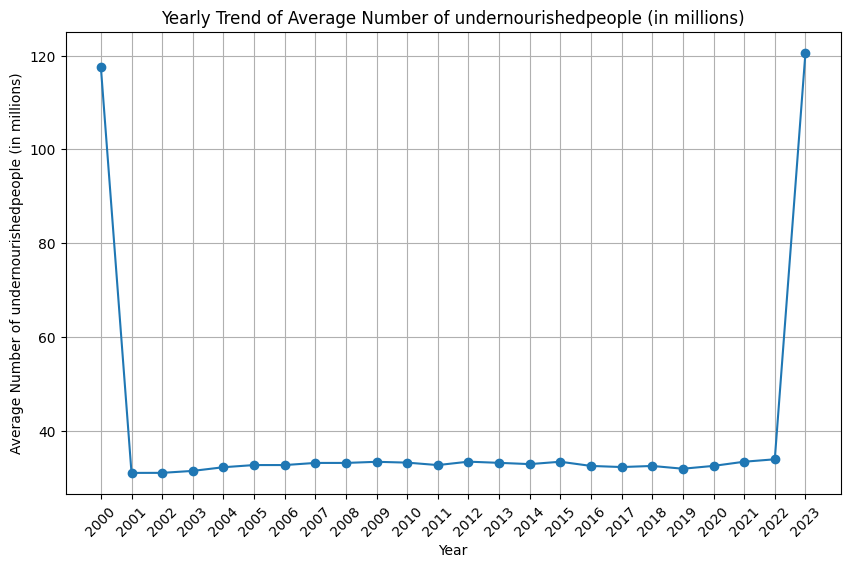

In [ ]:
#Yearly Trends for Indicators
from pyspark.sql.functions import avg
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and calculate the average value
yearly_trend = df[df['item']=='Numberofundernourishedpeople'].groupBy("year").agg(avg("avg_value").alias("avg_value")).orderBy("year")

# Convert to Pandas for visualization
yearly_trend_pd = yearly_trend.toPandas()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend_pd['year'], yearly_trend_pd['avg_value'], marker='o')
plt.title("Yearly Trend of Average Number of undernourishedpeople (in millions)")
plt.xlabel("Year")
plt.ylabel("Average Number of undernourishedpeople (in millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


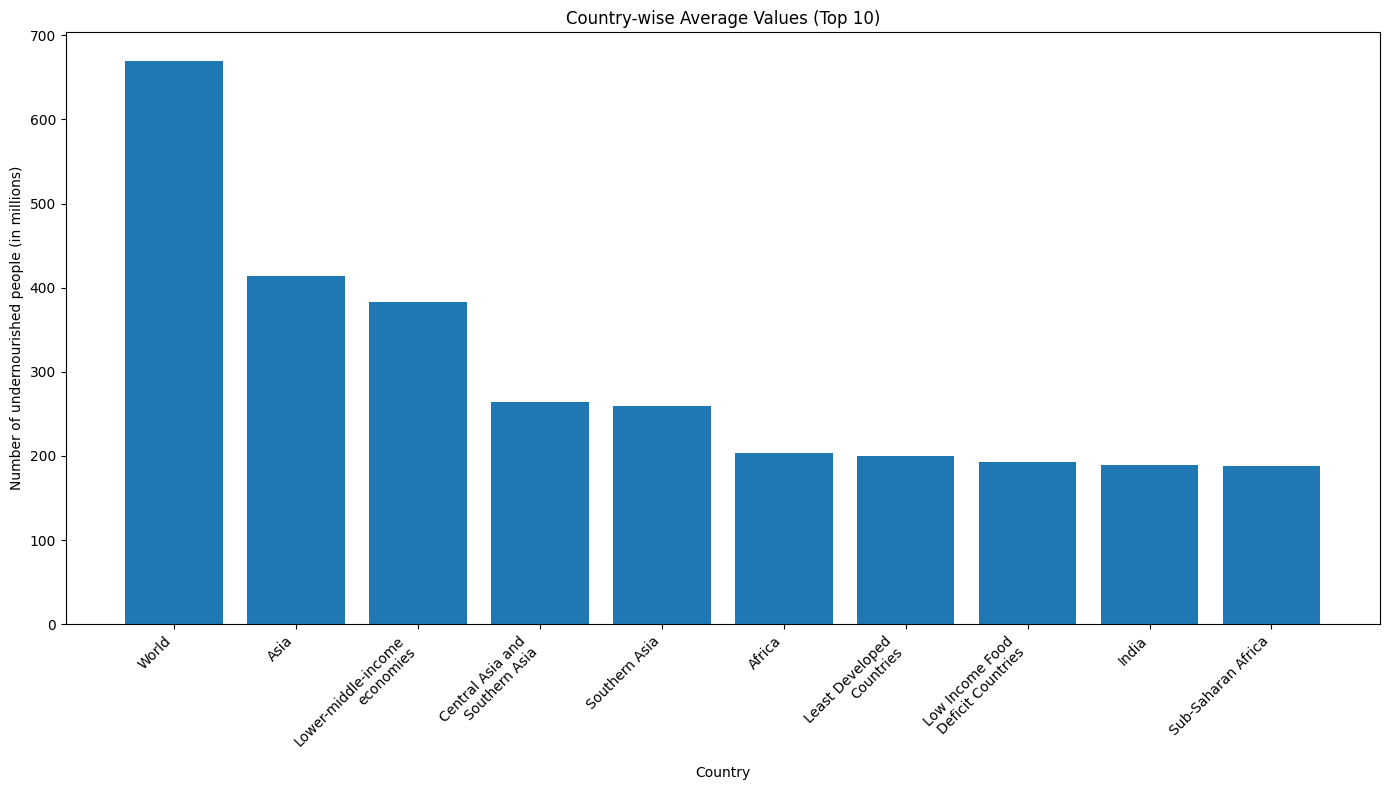

In [ ]:
import textwrap

# Country-wise Comparison
# Group by area and calculate the average value
country_trend = df[df['item'] == 'Numberofundernourishedpeople'].groupBy("area").agg(avg("avg_value").alias("avg_value")).orderBy("avg_value", ascending=False)

# Convert to Pandas for visualization
country_trend_pd = country_trend.limit(10).toPandas()  # Top 10 countries

# Wrap long text in area names for better display
country_trend_pd['area'] = country_trend_pd['area'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=20)))

# Plot the comparison
plt.figure(figsize=(14, 8))  # Make the plot wider for more space
plt.bar(country_trend_pd['area'], country_trend_pd['avg_value'])
plt.title("Country-wise Average Values (Top 10)")
plt.xlabel("Country")
plt.ylabel("Number of undernourished people (in millions)")
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.tight_layout()  # Ensure everything fits nicely
plt.show()


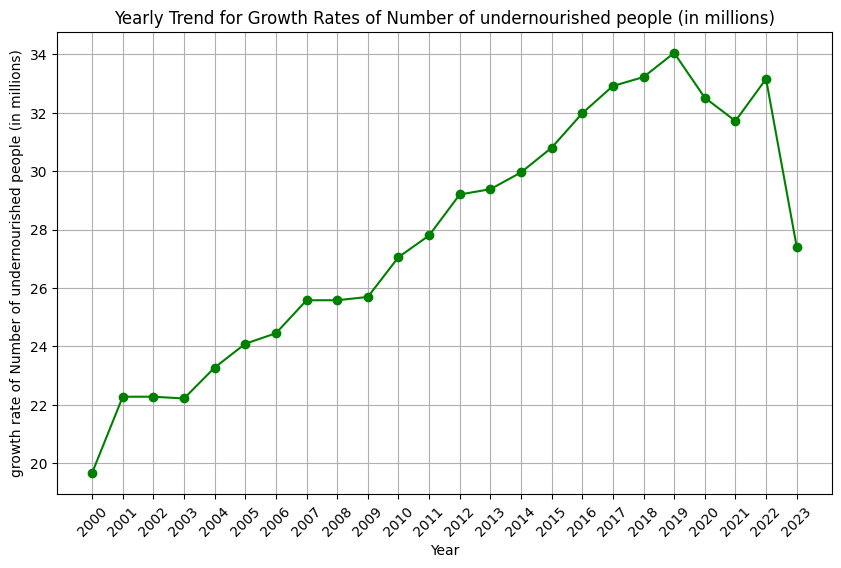

In [ ]:
#Growth Rate Trends for Indicators
# Group by year and calculate average growth rate
growth_trend = df[df['item'] == 'Numberofundernourishedpeople'].groupBy("year").agg(avg("growth_rate").alias("avg_growth_rate")).orderBy("year")

# Convert to Pandas for visualization
growth_trend_pd = growth_trend.toPandas()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(growth_trend_pd['year'], growth_trend_pd['avg_growth_rate'], marker='o', color='green')
plt.title("Yearly Trend for Growth Rates of Number of undernourished people (in millions)")
plt.xlabel("Year")
plt.ylabel("growth rate of Number of undernourished people (in millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Filter for the required factor and convert to Pandas DataFrame
geo_data = (
    df.filter(df["item"] == "Numberofundernourishedpeople")
    .select("area", "year", "value")
    .toPandas()
)

# Ensure 'value' is numeric
geo_data["value"] = pd.to_numeric(geo_data["value"], errors="coerce")

# Drop rows with NaN values
geo_data = geo_data.dropna(subset=["value"])

# Aggregate the data to handle duplicates (if any)
geo_data = geo_data.groupby(["area", "year"], as_index=False).agg({"value": "mean"})

# Create the choropleth map with a dropdown to select the year
fig = px.choropleth(
    geo_data,
    locations="area",  # The column with country names
    locationmode="country names",  # Match country names to map
    color="value",  # The column for the values to be visualized
    hover_name="area",  # Display country name on hover
    animation_frame="year",  # Animate across years
    title="Number of undernourished people (in millions)",
    color_continuous_scale="YlOrRd",  # Color scale
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth",
    ),
    coloraxis_colorbar=dict(
        title="Prevalence (in millions)",
    ),
     width=1000,  # Adjusted width for a larger map
    height=600,  # Adjusted height for a larger map
)

fig.show()


In [ ]:
# import plotly.express as px
# import pandas as pd

# # Convert Spark DataFrame to Pandas DataFrame for visualization
# data_pd = df.select("year", "area", "item_code", "avg_value").toPandas()

# # Create the Plotly figure
# fig = px.line(
#     data_pd,
#     x="year",
#     y="avg_value",
#     color="area",
#     title="Trends Over the Years for Selected Indicator",
#     labels={"avg_value": "Average Value", "year": "Year"},
#     facet_col_wrap=1,
# )

# # Add a dropdown menu for indicator selection
# fig.update_layout(
#     updatemenus=[
#         dict(
#             buttons=[
#                 dict(
#                     args=[{"y": [data_pd.loc[data_pd["item_code"] == indicator, "avg_value"]]}],
#                     label=str(indicator),
#                     method="update",
#                 )
#                 for indicator in data_pd["item_code"]
#             ]
#         )
#     ]
# )

# # Show the plot
# fig.show()


**Cost of a healthy diet**

In [ ]:
%%writefile mapper1.py
#!/usr/bin/env python3

import sys
import csv

# Mapper Code
for line in sys.stdin:
    line = line.strip()
    # Use csv reader to parse CSV line
    csv_reader = csv.reader([line])
    for row in csv_reader:
        try:
            # Extract necessary fields
            area = row[3]  # Country
            item_code = row[6]  # Item Code
            value = row[11]  # Value
            year = row[9] #year

            # Filter for specific item code (7004: Cost of a healthy diet)
            if item_code == "7004" and value != "":
                # Emit the key-value pair
                print(f"{area}\t{year}\t{value}")
        except IndexError:
            # Handle cases with missing columns
            continue




Writing mapper1.py


In [ ]:
%%writefile reducer1.py
#!/usr/bin/env python3

import sys

# Initialize variables
current_country = None
current_year = None
total_cost = 0.0
count = 0

# Reducer Code
for line in sys.stdin:
    line = line.strip()
    country, year, cost = line.split("\t", 2)

    try:
        cost = float(cost)
    except ValueError:
        continue

    # Sort by year and process records
    if current_country == country and current_year == year:
        total_cost += cost
        count += 1
    else:
        if current_country and current_year:
            # Output the result for the previous country and year
            average_cost = total_cost / count
            print(f"{current_country}\t{current_year}\t{average_cost:.2f}")

        # Reset for new country or year
        current_country = country
        current_year = year
        total_cost = cost
        count = 1

# Output the last country and year if needed
if current_country and current_year:
    average_cost = total_cost / count
    print(f"{current_country}\t{current_year}\t{average_cost:.2f}")



Writing reducer1.py


In [ ]:
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -input /data/FAOSTAT_data_en_11-15-2024.csv \
    -output /output1 \
    -file '/content/mapper1.py' \
    -file '/content/reducer1.py' \
    -mapper "python mapper1.py" \
    -reducer "python reducer1.py"

2024-11-20 19:26:00,565 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper1.py, /content/reducer1.py] [] /tmp/streamjob15731671274684902596.jar tmpDir=null
2024-11-20 19:26:01,673 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-11-20 19:26:01,925 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-11-20 19:26:01,926 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-11-20 19:26:01,963 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-11-20 19:26:02,297 INFO mapred.FileInputFormat: Total input files to process : 1
2024-11-20 19:26:02,344 INFO mapreduce.JobSubmitter: number of splits:1
2024-11-20 19:26:02,757 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1717422733_0001
2024-11-20 19:26:02,758 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-11-20 19:26:03,281 INFO mapred.

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /output1/part-00000

Albania	2019	3.32
Albania	2020	3.40
Albania	2017	3.04
Albania	2021	3.55
Albania	2022	4.19
Albania	2018	3.13
Algeria	2017	4.06
Algeria	2018	4.13
Algeria	2019	4.10
Algeria	2020	4.06
Algeria	2021	4.36
Algeria	2022	4.89
Angola	2017	3.44
Angola	2018	3.41
Angola	2019	3.46
Angola	2020	3.65
Angola	2021	4.00
Angola	2022	4.41
Antigua and Barbuda	2017	3.93
Antigua and Barbuda	2018	4.11
Antigua and Barbuda	2019	4.20
Antigua and Barbuda	2020	4.31
Antigua and Barbuda	2021	4.48
Antigua and Barbuda	2022	4.97
Argentina	2017	3.32
Armenia	2019	3.36
Armenia	2017	3.21
Armenia	2018	3.28
Armenia	2020	3.37
Armenia	2021	3.66
Armenia	2022	4.11
Aruba	2017	3.47
Aruba	2018	3.68
Aruba	2019	3.97
Aruba	2020	4.09
Aruba	2021	4.20
Aruba	2022	4.71
Australia	2017	2.33
Australia	2018	2.36
Australia	2019	2.40
Australia	2020	2.51
Australia	2021	2.58
Australia	2022	2.90
Austria	2017	2.06
Austria	2018	2.11
Austria	2019	2.19
Austria	2020	2.30
Austria	2021	2.43
Austria	2022	2.76
Azerbaijan	2017	2.87
Azerbaijan	2018	2.93
Azerbaij

**Prevalence of unaffordability**

In [ ]:
%%writefile mapper2.py
#!/usr/bin/env python3

import sys
import csv

# Mapper Code
for line in sys.stdin:
    line = line.strip()
    # Use csv reader to parse CSV line
    csv_reader = csv.reader([line])
    for row in csv_reader:
        try:
            # Extract necessary fields
            area = row[3]  # Country
            item_code = row[6]  # Item Code
            value = row[11]  # Value
            year = row[9] #year

            # Filter for specific item code (7004: Cost of a healthy diet)
            if item_code == "7005" and value != "":
                # Emit the key-value pair
                print(f"{area}\t{year}\t{value}")
        except IndexError:
            # Handle cases with missing columns
            continue




Writing mapper2.py


In [ ]:
%%writefile reducer2.py
#!/usr/bin/env python3

import sys

# Initialize variables
current_country = None
current_year = None
total_cost = 0.0
count = 0

# Reducer Code
for line in sys.stdin:
    line = line.strip()
    country, year, cost = line.split("\t", 2)

    try:
        cost = float(cost)
    except ValueError:
        continue

    # Sort by year and process records
    if current_country == country and current_year == year:
        total_cost += cost
        count += 1
    else:
        if current_country and current_year:
            # Output the result for the previous country and year
            average_cost = total_cost / count
            print(f"{current_country}\t{current_year}\t{average_cost:.2f}")

        # Reset for new country or year
        current_country = country
        current_year = year
        total_cost = cost
        count = 1

# Output the last country and year if needed
if current_country and current_year:
    average_cost = total_cost / count
    print(f"{current_country}\t{current_year}\t{average_cost:.2f}")



Writing reducer2.py


In [ ]:
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -input /data/FAOSTAT_data_en_11-15-2024.csv \
    -output /output2 \
    -file '/content/mapper2.py' \
    -file '/content/reducer2.py' \
    -mapper "python mapper2.py" \
    -reducer "python reducer2.py"

2024-11-20 19:26:10,629 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper2.py, /content/reducer2.py] [] /tmp/streamjob8356307156386114219.jar tmpDir=null
2024-11-20 19:26:12,474 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-11-20 19:26:12,914 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-11-20 19:26:12,915 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-11-20 19:26:12,992 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-11-20 19:26:13,671 INFO mapred.FileInputFormat: Total input files to process : 1
2024-11-20 19:26:13,737 INFO mapreduce.JobSubmitter: number of splits:1
2024-11-20 19:26:14,383 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1199183976_0001
2024-11-20 19:26:14,384 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-11-20 19:26:15,633 INFO mapred.L

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /output2/part-00000

Albania	2022	12.20
Albania	2017	24.30
Albania	2018	17.50
Albania	2019	15.30
Albania	2020	14.10
Albania	2021	12.60
Algeria	2018	17.00
Algeria	2021	18.70
Algeria	2017	17.80
Algeria	2020	18.30
Algeria	2022	19.70
Algeria	2019	16.40
Angola	2020	70.10
Angola	2017	62.70
Angola	2018	65.10
Angola	2019	66.80
Angola	2021	71.70
Angola	2022	72.20
Argentina	2017	8.60
Armenia	2017	49.30
Armenia	2018	49.50
Armenia	2019	53.30
Armenia	2020	53.80
Armenia	2021	54.10
Armenia	2022	54.90
Australia	2022	3.20
Australia	2017	2.90
Australia	2018	3.20
Australia	2019	3.20
Australia	2020	3.50
Australia	2021	3.20
Austria	2017	2.50
Austria	2018	2.30
Austria	2019	2.70
Austria	2020	2.50
Austria	2021	3.40
Austria	2022	2.90
Azerbaijan	2017	0.70
Azerbaijan	2018	0.70
Azerbaijan	2019	0.70
Azerbaijan	2020	1.20
Azerbaijan	2021	0.70
Azerbaijan	2022	0.70
Bangladesh	2017	65.00
Bangladesh	2018	61.40
Bangladesh	2019	58.50
Bangladesh	2020	55.80
Bangladesh	2021	51.70
Bangladesh	2022	48.20
Belarus	2017	3.20
Belarus	2018	1.90
Belarus	

**Number of people unable to afford**

In [ ]:
%%writefile mapper3.py
#!/usr/bin/env python3
import sys
import csv

# Mapper Code
for line in sys.stdin:
    line = line.strip()
    # Use csv reader to parse CSV line
    csv_reader = csv.reader([line])
    for row in csv_reader:
        try:
            # Extract necessary fields
            area = row[3]  # Country
            item_code = row[6]  # Item Code
            value = row[11]  # Value
            year = row[9]  # Year


            if item_code == "7006" and value != "":
                # Emit the key-value pair with area and year
                print(f"{area}\t{year}\t{value}")
        except IndexError:
            # Handle cases with missing columns
            continue


Writing mapper3.py


In [ ]:
%%writefile reducer3.py
#!/usr/bin/env python3

import sys

# Initialize variables
current_country = None
current_year = None
total_cost = 0.0
count = 0

# Reducer Code
for line in sys.stdin:
    line = line.strip()
    country, year, cost = line.split("\t", 2)

    try:
        cost = float(cost)
    except ValueError:
        continue

    # Sort by year and process records
    if current_country == country and current_year == year:
        total_cost += cost
        count += 1
    else:
        if current_country and current_year:
            # Output the result for the previous country and year
            average_cost = total_cost / count
            print(f"{current_country}\t{current_year}\t{average_cost:.2f}")

        # Reset for new country or year
        current_country = country
        current_year = year
        total_cost = cost
        count = 1

# Output the last country and year if needed
if current_country and current_year:
    average_cost = total_cost / count
    print(f"{current_country}\t{current_year}\t{average_cost:.2f}")



Writing reducer3.py


In [ ]:
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -input /data/FAOSTAT_data_en_11-15-2024.csv \
    -output /output3 \
    -file '/content/mapper3.py' \
    -file '/content/reducer3.py' \
    -mapper "python mapper3.py" \
    -reducer "python reducer3.py"

2024-11-20 19:26:22,062 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper3.py, /content/reducer3.py] [] /tmp/streamjob4729040894536540072.jar tmpDir=null
2024-11-20 19:26:23,068 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-11-20 19:26:23,306 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-11-20 19:26:23,306 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-11-20 19:26:23,343 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-11-20 19:26:23,624 INFO mapred.FileInputFormat: Total input files to process : 1
2024-11-20 19:26:23,653 INFO mapreduce.JobSubmitter: number of splits:1
2024-11-20 19:26:24,060 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1961926877_0001
2024-11-20 19:26:24,060 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-11-20 19:26:24,575 INFO mapred.L

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /output3/part-00000

Albania	2022	0.30
Albania	2017	0.70
Albania	2018	0.50
Albania	2019	0.40
Albania	2020	0.40
Albania	2021	0.40
Algeria	2018	7.10
Algeria	2021	8.30
Algeria	2017	7.30
Algeria	2020	7.90
Algeria	2022	8.80
Algeria	2019	7.00
Angola	2020	23.40
Angola	2017	18.90
Angola	2018	20.40
Angola	2019	21.60
Angola	2021	24.70
Angola	2022	25.70
Argentina	2017	3.80
Armenia	2017	1.40
Armenia	2018	1.40
Armenia	2019	1.50
Armenia	2020	1.50
Armenia	2021	1.50
Armenia	2022	1.50
Australia	2022	0.80
Australia	2017	0.70
Australia	2018	0.80
Australia	2019	0.80
Australia	2020	0.90
Australia	2021	0.80
Austria	2017	0.20
Austria	2018	0.20
Austria	2019	0.20
Austria	2020	0.20
Austria	2021	0.30
Austria	2022	0.30
Azerbaijan	2017	0.10
Azerbaijan	2018	0.10
Azerbaijan	2019	0.10
Azerbaijan	2020	0.10
Azerbaijan	2021	0.10
Azerbaijan	2022	0.10
Bangladesh	2017	105.20
Bangladesh	2018	100.50
Bangladesh	2019	96.80
Bangladesh	2020	93.40
Bangladesh	2021	87.60
Bangladesh	2022	82.40
Belarus	2017	0.30
Belarus	2018	0.20
Belarus	2019	0.20
Belaru

**Cost of starchy staples**

In [ ]:
%%writefile mapper4.py
#!/usr/bin/env python3
import sys
import csv

# Mapper Code
for line in sys.stdin:
    line = line.strip()
    # Use csv reader to parse CSV line
    csv_reader = csv.reader([line])
    for row in csv_reader:
        try:
            # Extract necessary fields
            area = row[3]  # Country
            item_code = row[6]  # Item Code
            value = row[11]  # Value
            year = row[9]  # Year

            # Filter for specific item code (7007: Cost of a healthy diet)
            if item_code == "7007" and value != "":
                # Emit the key-value pair with area and year
                print(f"{area}\t{year}\t{value}")
        except IndexError:
            # Handle cases with missing columns
            continue


Writing mapper4.py


In [ ]:
%%writefile reducer4.py
#!/usr/bin/env python3

import sys

# Initialize variables
current_country = None
current_year = None
total_cost = 0.0
count = 0

# Reducer Code
for line in sys.stdin:
    line = line.strip()
    country, year, cost = line.split("\t", 2)

    try:
        cost = float(cost)
    except ValueError:
        continue

    # Sort by year and process records
    if current_country == country and current_year == year:
        total_cost += cost
        count += 1
    else:
        if current_country and current_year:
            # Output the result for the previous country and year
            average_cost = total_cost / count
            print(f"{current_country}\t{current_year}\t{average_cost:.2f}")

        # Reset for new country or year
        current_country = country
        current_year = year
        total_cost = cost
        count = 1

# Output the last country and year if needed
if current_country and current_year:
    average_cost = total_cost / count
    print(f"{current_country}\t{current_year}\t{average_cost:.2f}")



Writing reducer4.py


In [ ]:
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -input /data/FAOSTAT_data_en_11-15-2024.csv \
    -output /output4 \
    -file '/content/mapper4.py' \
    -file '/content/reducer4.py' \
    -mapper "python mapper4.py" \
    -reducer "python reducer4.py"

2024-11-20 19:26:32,706 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper4.py, /content/reducer4.py] [] /tmp/streamjob15237749171684059216.jar tmpDir=null
2024-11-20 19:26:33,667 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-11-20 19:26:33,905 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-11-20 19:26:33,906 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-11-20 19:26:33,938 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-11-20 19:26:34,308 INFO mapred.FileInputFormat: Total input files to process : 1
2024-11-20 19:26:34,354 INFO mapreduce.JobSubmitter: number of splits:1
2024-11-20 19:26:34,726 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local285867125_0001
2024-11-20 19:26:34,726 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-11-20 19:26:35,193 INFO mapred.L

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /output4/part-00000

Albania	2017	0.60
Albania	2021	0.48
Algeria	2017	0.50
Algeria	2021	0.54
Angola	2017	0.84
Angola	2021	1.12
Antigua and Barbuda	2017	0.60
Antigua and Barbuda	2021	0.61
Argentina	2017	0.46
Armenia	2021	0.57
Armenia	2017	0.54
Aruba	2017	0.80
Aruba	2021	0.59
Australia	2017	0.22
Australia	2021	0.25
Austria	2017	0.23
Austria	2021	0.27
Azerbaijan	2017	0.45
Azerbaijan	2021	0.65
Bahamas	2017	0.57
Bahrain	2017	0.65
Bahrain	2021	0.53
Bangladesh	2021	0.40
Bangladesh	2017	0.36
Belarus	2017	0.51
Belarus	2021	0.61
Belgium	2017	0.22
Belgium	2021	0.22
Belize	2017	0.38
Belize	2021	0.53
Benin	2021	0.61
Benin	2017	0.41
Bermuda	2017	0.74
Bermuda	2021	0.50
Bhutan	2017	0.54
Bhutan	2021	0.56
Bolivia (Plurinational State of)	2017	0.78
Bolivia (Plurinational State of)	2021	0.76
Bosnia and Herzegovina	2017	0.54
Bosnia and Herzegovina	2021	0.65
Botswana	2017	0.39
Botswana	2021	0.55
Brazil	2017	0.44
Brazil	2021	0.62
British Virgin Islands	2017	0.81
British Virgin Islands	2021	0.76
Brunei Darussalam	2017	0.67
Brunei

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -get /output4 /content/output4
!$HADOOP_HOME/bin/hdfs dfs -get /output3 /content/output3
!$HADOOP_HOME/bin/hdfs dfs -get /output2 /content/output2
!$HADOOP_HOME/bin/hdfs dfs -get /output1 /content/output1

In [ ]:
!pip install hdfs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34324 sha256=86df2e2035c51022b3c36aa5d33ce41b2a472b742500ad7780523c2e20521c10
  Stored in directory: /root/.cache/pip/wheels/e5/8d/b6/99c1c0a3ac5788c866b0ecd3f48b0134a5910e6ed26011800b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d67ba2b021939c981e0915d24a6e98a9e09c745f940e20cfabea01f5d31071ac
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built hdfs docopt


In [ ]:
!pip install pyspark


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, corr
from pyspark.sql.types import FloatType
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Start Spark session
spark = SparkSession.builder.appName("HungerAnalysisProject").getOrCreate()

In [ ]:
# Read the data with tab as the delimiter
df = spark.read.csv("output1/part-00000", header=False, sep="\t")

# Rename the columns for clarity
df = df.toDF("Country", "Year", "Cost")


['Country', 'Year', 'Cost']


<ipython-input-65-d4187c462784>:35: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




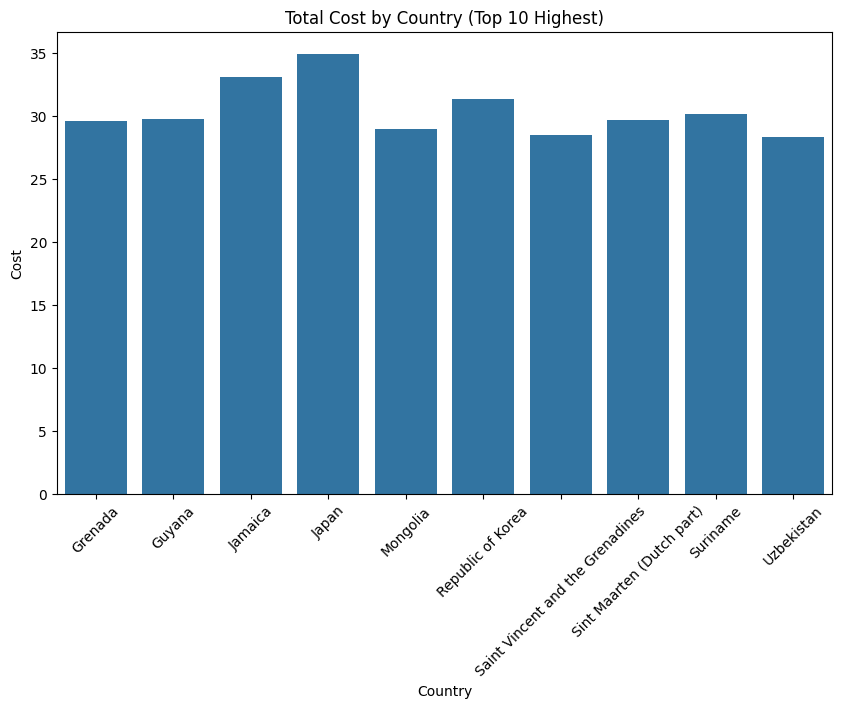

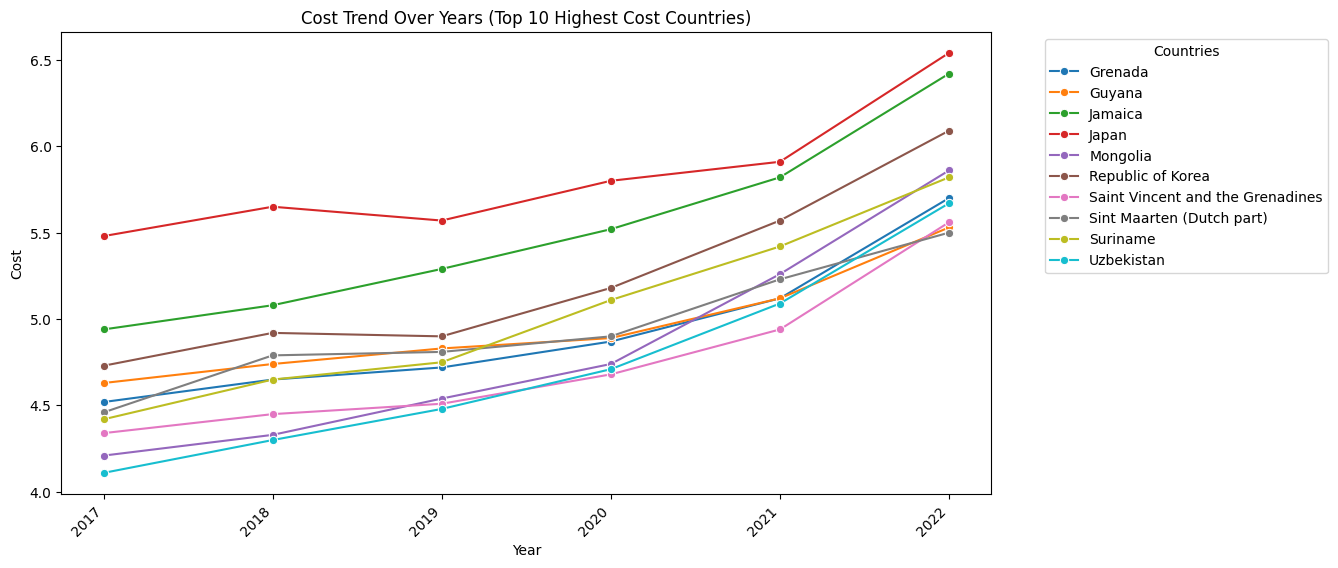

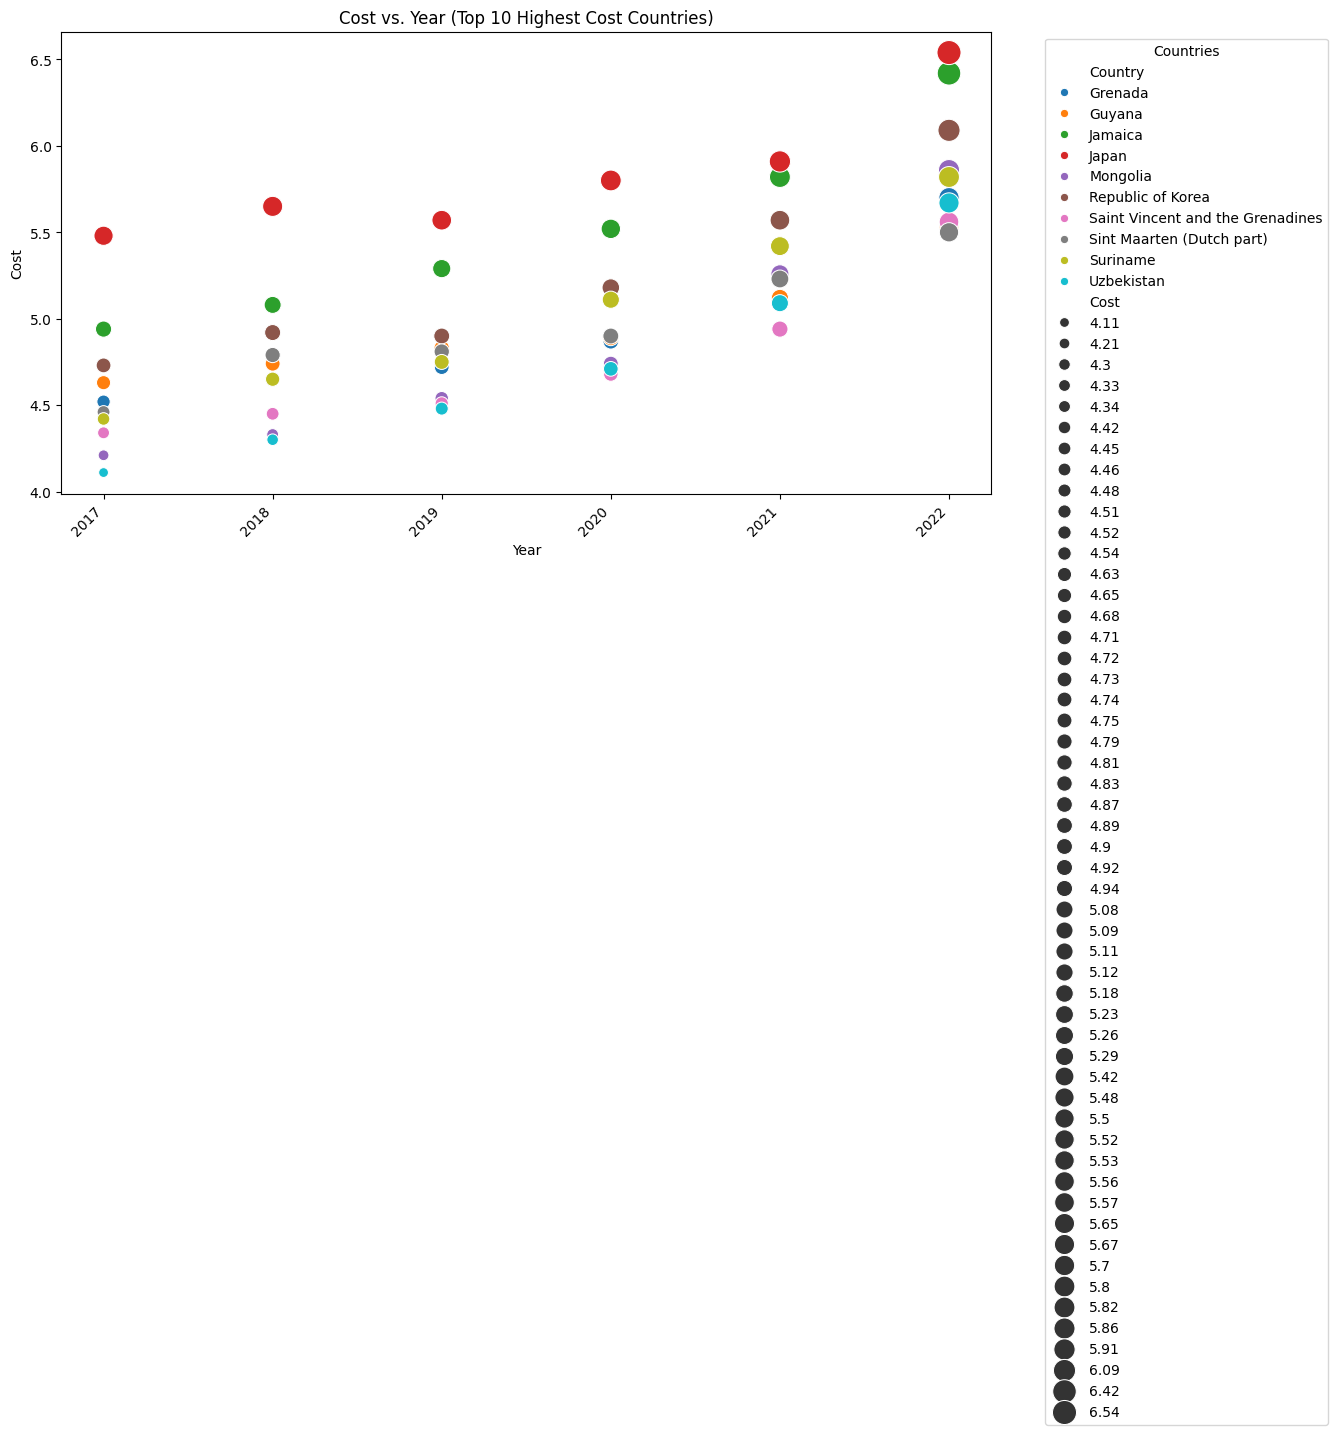

In [ ]:
from pyspark.sql.functions import split

# Check the columns in your DataFrame
print(df.columns)

# If "Country", "Year", and "Cost" already exist, skip the splitting step
if "_c0" in df.columns:
    # Split the single column "_c0" into "Country", "Year", and "Cost"
    df = df.select(
        split(df["_c0"], "\t")[0].alias("Country"),
        split(df["_c0"], "\t")[1].alias("Year"),
        split(df["_c0"], "\t")[2].alias("Cost")
    )

# Convert to Pandas DataFrame for visualization
pdf = df.toPandas()

# Ensure proper data types for visualization
pdf["Cost"] = pdf["Cost"].astype(float)
pdf["Year"] = pdf["Year"].astype(int)

# Calculate total cost by country
total_cost = pdf.groupby("Country", as_index=False).agg({"Cost": "sum"})

# Get the top 10 countries with the highest total cost
highest_cost_countries = total_cost.nlargest(10, "Cost")["Country"].tolist()

# Filter the original data for these countries
filtered_pdf = pdf[pdf["Country"].isin(highest_cost_countries)]

# Visualization

# 1. Bar Plot: Total cost by country (Top 10 Highest Cost Countries)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cost[total_cost["Country"].isin(highest_cost_countries)], x="Country", y="Cost", ci=None)
plt.title("Total Cost by Country (Top 10 Highest)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Line Plot: Cost trend over years (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels
sns.lineplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", marker="o")
plt.title("Cost Trend Over Years (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, adjust the number of countries or create a legend outside the plot
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Visualization 3: Scatter Plot: Cost vs. Year (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels

# Scatter plot with adjusted size
sns.scatterplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", size="Cost", sizes=(50, 300), legend="full")

plt.title("Cost vs. Year (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the legend for country names
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



In [ ]:
# Read the data with tab as the delimiter
df = spark.read.csv("output2/part-00000", header=False, sep="\t")

# Rename the columns for clarity
df = df.toDF("Country", "Year", "Cost")

['Country', 'Year', 'Cost']


<ipython-input-67-d4187c462784>:35: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




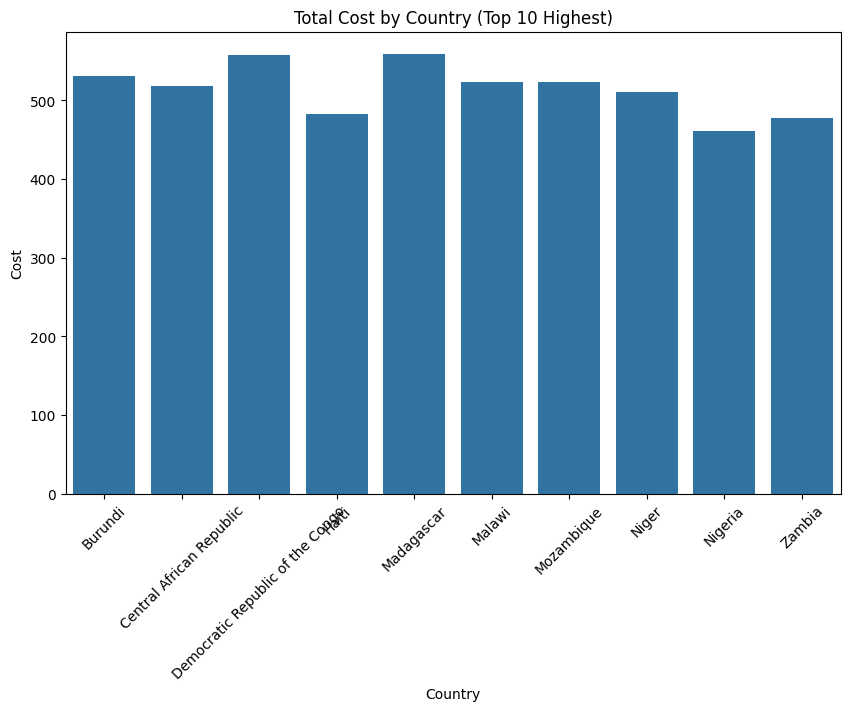

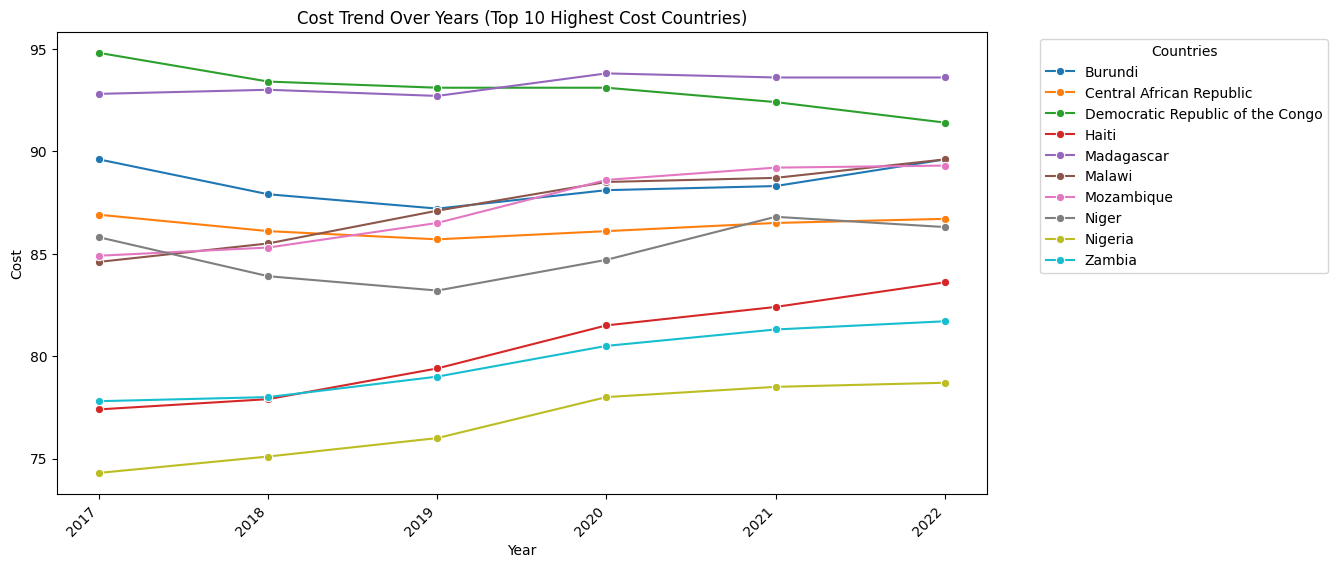

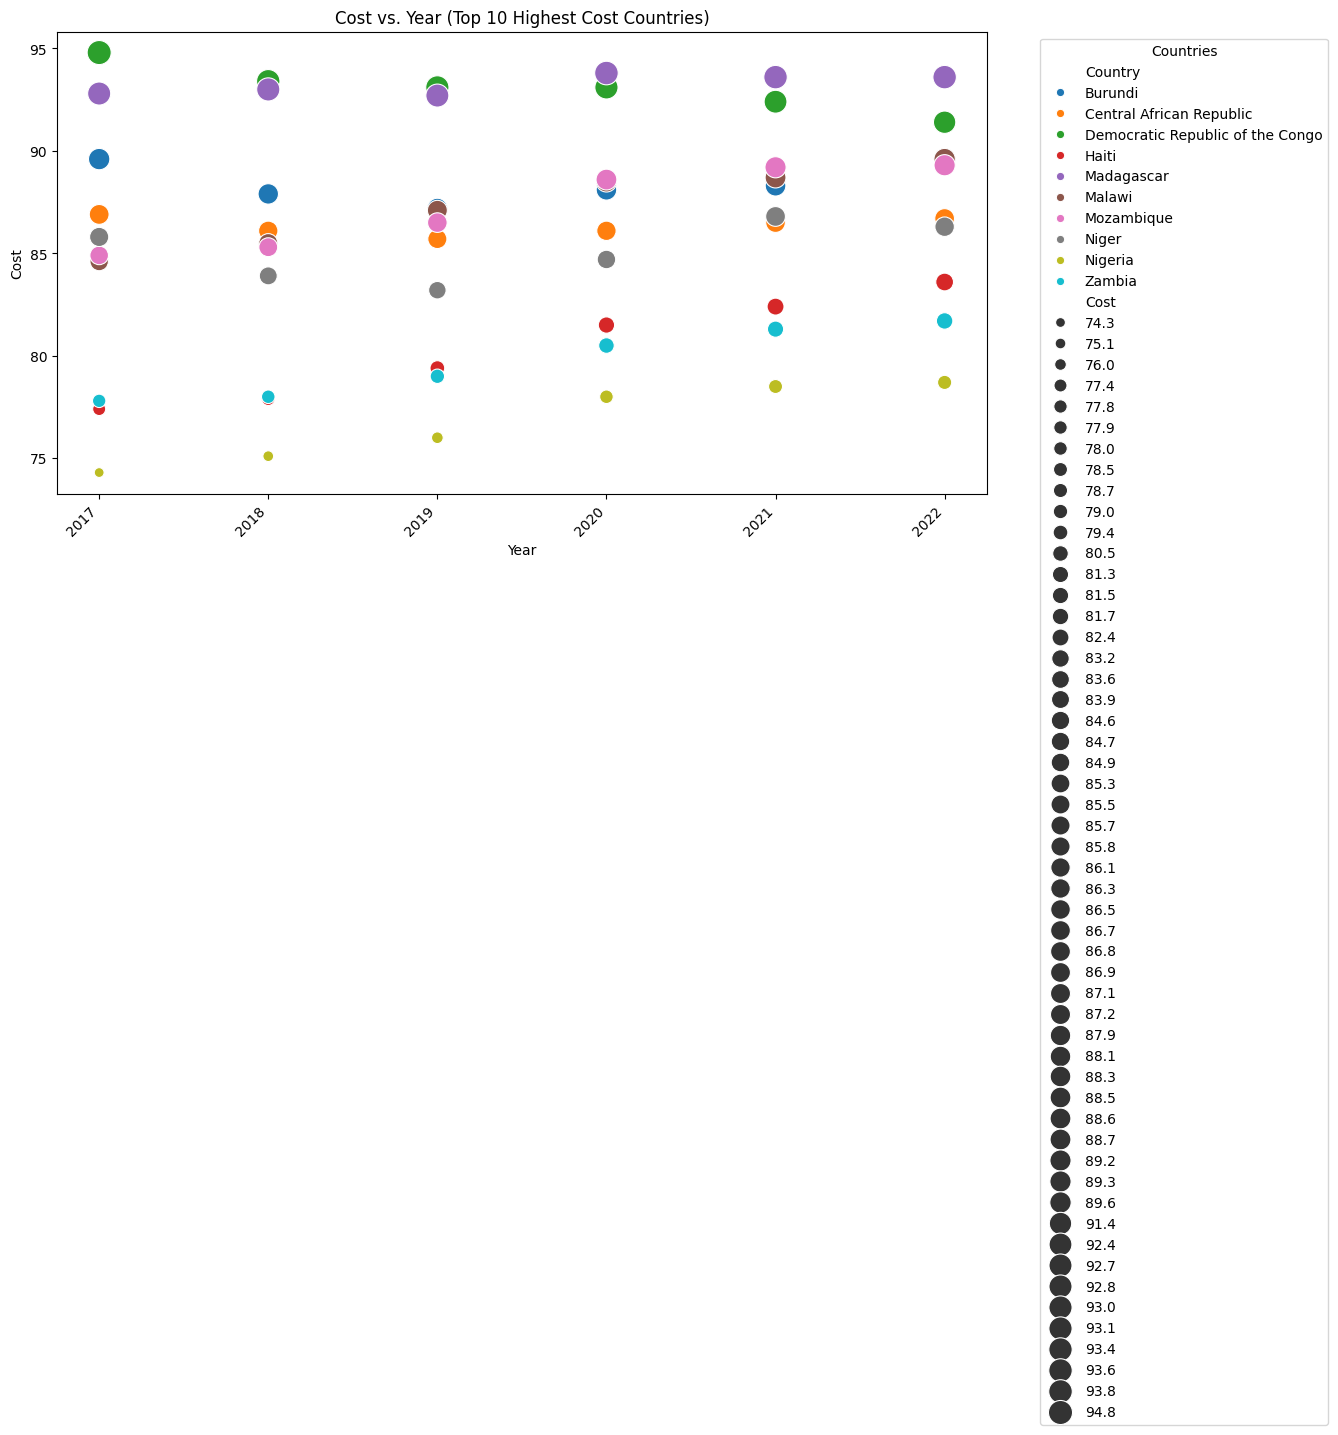

In [ ]:
from pyspark.sql.functions import split

# Check the columns in your DataFrame
print(df.columns)

# If "Country", "Year", and "Cost" already exist, skip the splitting step
if "_c0" in df.columns:
    # Split the single column "_c0" into "Country", "Year", and "Cost"
    df = df.select(
        split(df["_c0"], "\t")[0].alias("Country"),
        split(df["_c0"], "\t")[1].alias("Year"),
        split(df["_c0"], "\t")[2].alias("Cost")
    )

# Convert to Pandas DataFrame for visualization
pdf = df.toPandas()

# Ensure proper data types for visualization
pdf["Cost"] = pdf["Cost"].astype(float)
pdf["Year"] = pdf["Year"].astype(int)

# Calculate total cost by country
total_cost = pdf.groupby("Country", as_index=False).agg({"Cost": "sum"})

# Get the top 10 countries with the highest total cost
highest_cost_countries = total_cost.nlargest(10, "Cost")["Country"].tolist()

# Filter the original data for these countries
filtered_pdf = pdf[pdf["Country"].isin(highest_cost_countries)]

# Visualization

# 1. Bar Plot: Total cost by country (Top 10 Highest Cost Countries)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cost[total_cost["Country"].isin(highest_cost_countries)], x="Country", y="Cost", ci=None)
plt.title("Total Cost by Country (Top 10 Highest)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Line Plot: Cost trend over years (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels
sns.lineplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", marker="o")
plt.title("Cost Trend Over Years (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, adjust the number of countries or create a legend outside the plot
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Visualization 3: Scatter Plot: Cost vs. Year (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels

# Scatter plot with adjusted size
sns.scatterplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", size="Cost", sizes=(50, 300), legend="full")

plt.title("Cost vs. Year (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the legend for country names
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



In [ ]:
# Read the data with tab as the delimiter
df = spark.read.csv("output3/part-00000", header=False, sep="\t")

# Rename the columns for clarity
df = df.toDF("Country", "Year", "Cost")

['Country', 'Year', 'Cost']


<ipython-input-69-d4187c462784>:35: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




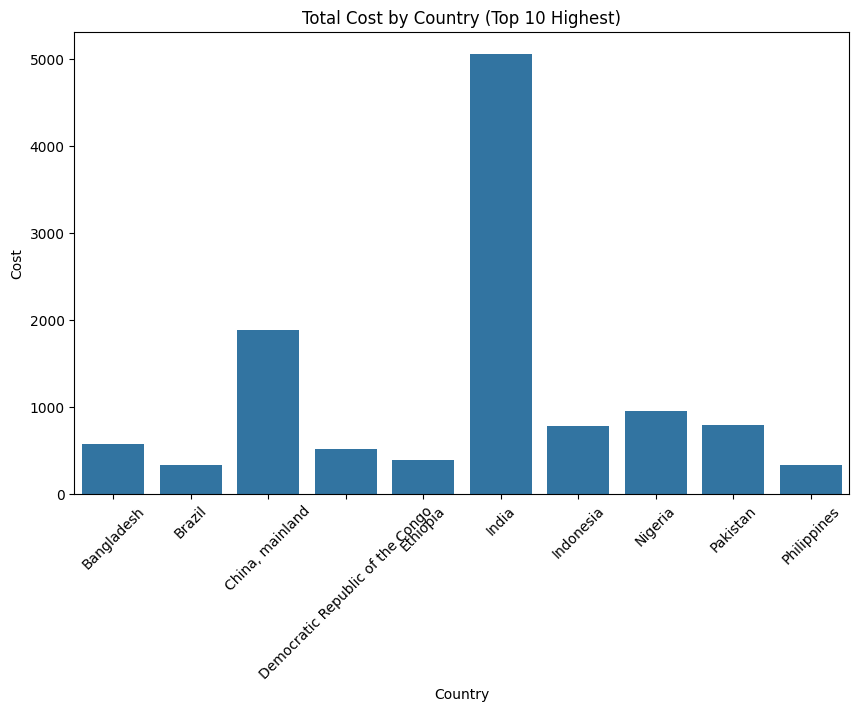

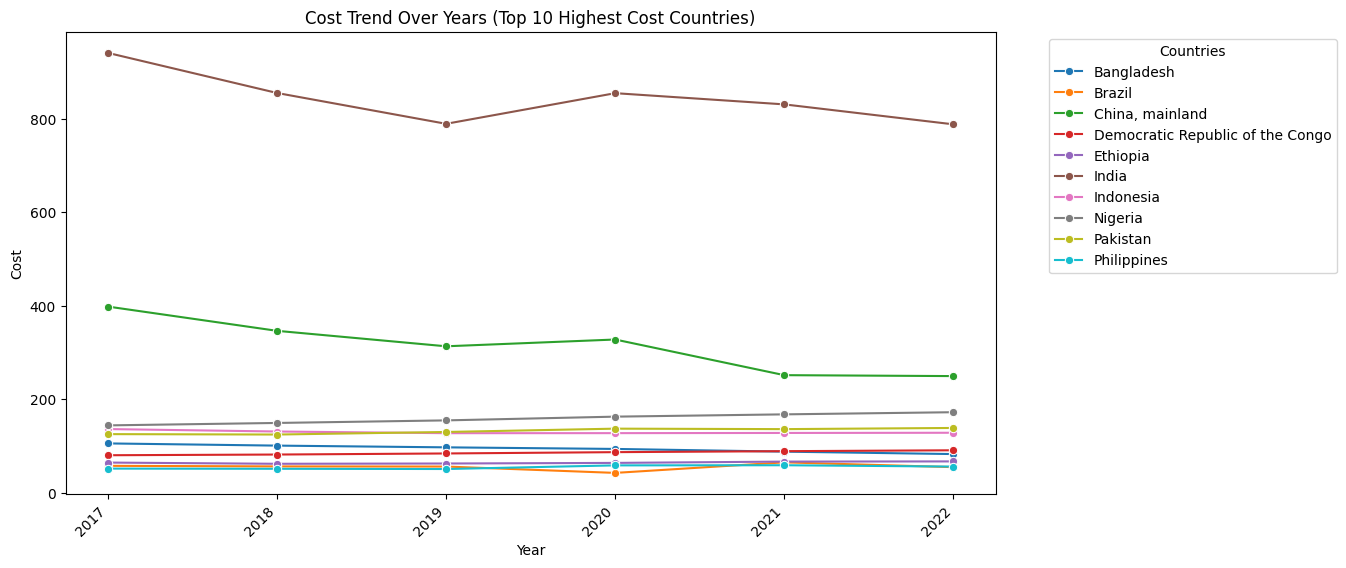

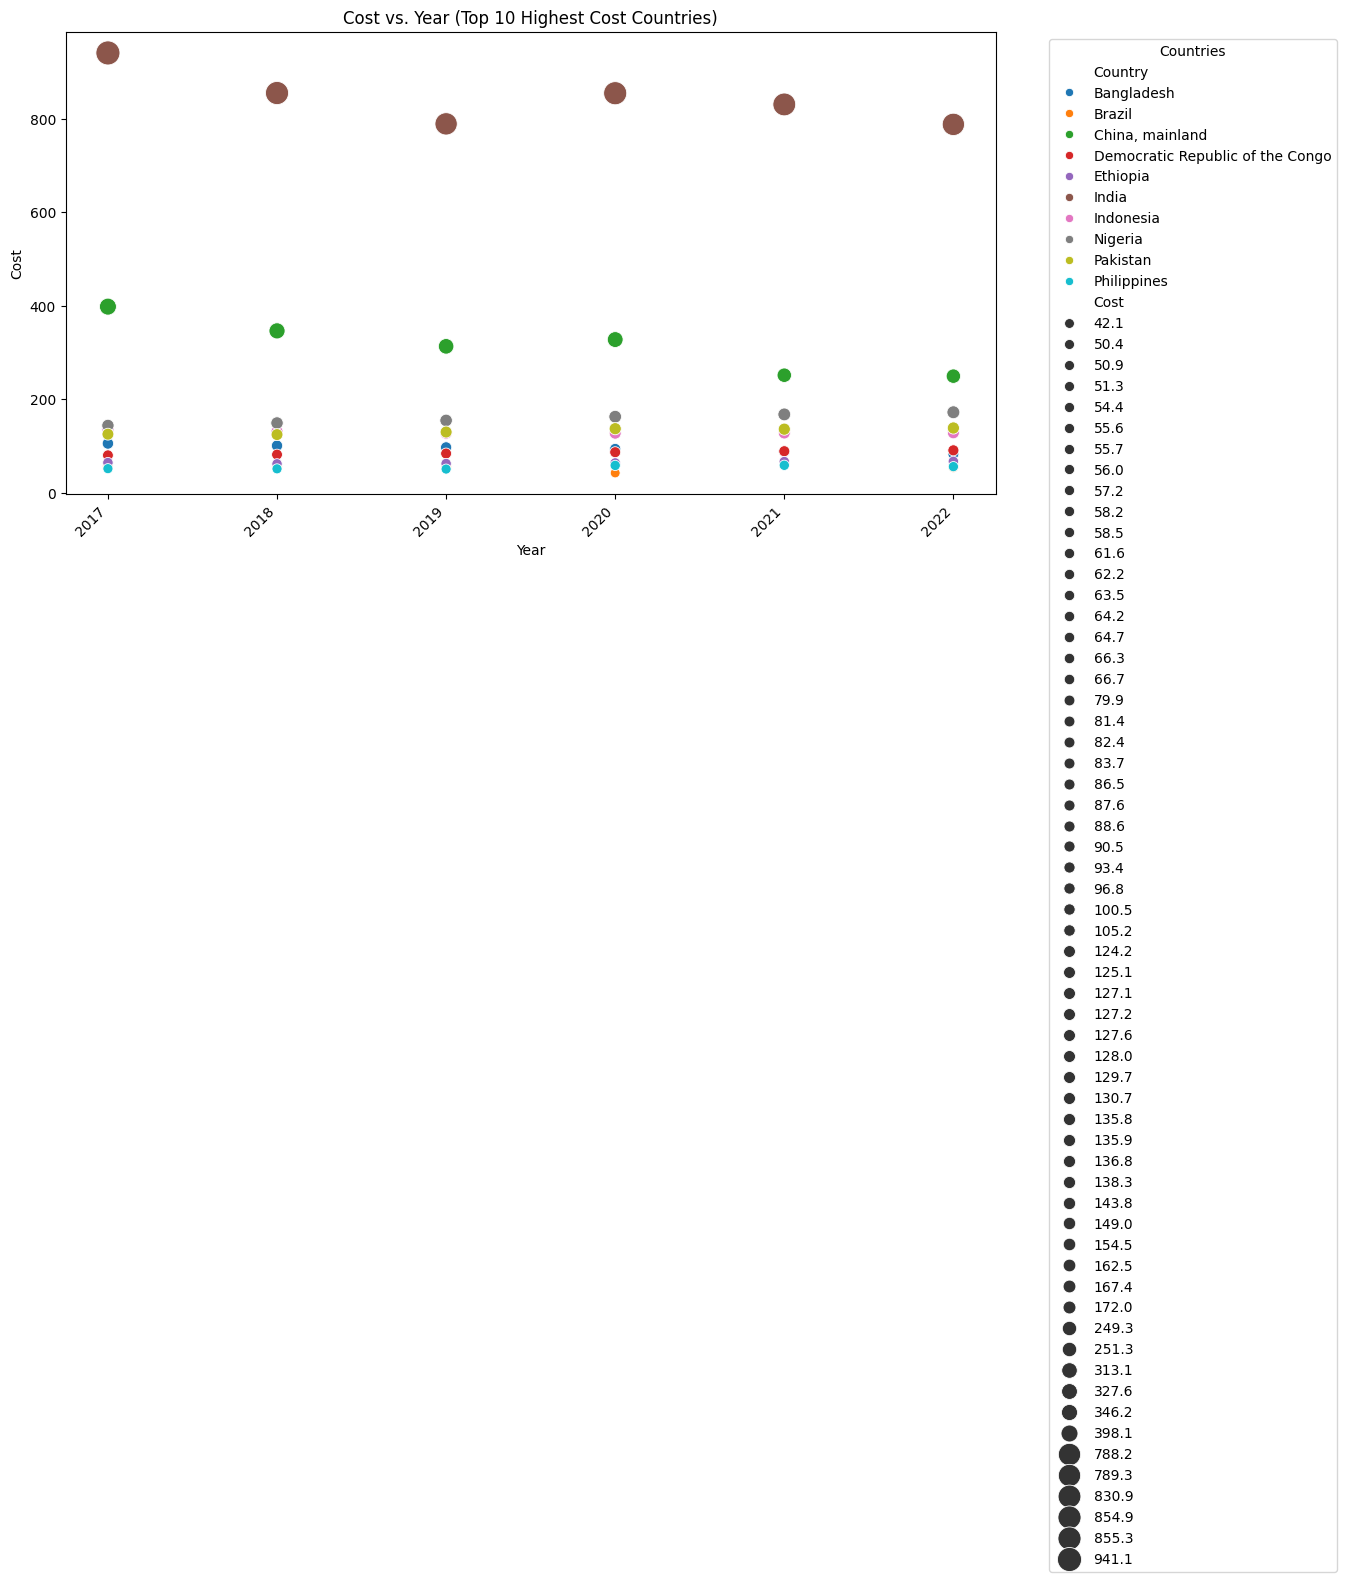

In [ ]:
from pyspark.sql.functions import split

# Check the columns in your DataFrame
print(df.columns)

# If "Country", "Year", and "Cost" already exist, skip the splitting step
if "_c0" in df.columns:
    # Split the single column "_c0" into "Country", "Year", and "Cost"
    df = df.select(
        split(df["_c0"], "\t")[0].alias("Country"),
        split(df["_c0"], "\t")[1].alias("Year"),
        split(df["_c0"], "\t")[2].alias("Cost")
    )

# Convert to Pandas DataFrame for visualization
pdf = df.toPandas()

# Ensure proper data types for visualization
pdf["Cost"] = pdf["Cost"].astype(float)
pdf["Year"] = pdf["Year"].astype(int)

# Calculate total cost by country
total_cost = pdf.groupby("Country", as_index=False).agg({"Cost": "sum"})

# Get the top 10 countries with the highest total cost
highest_cost_countries = total_cost.nlargest(10, "Cost")["Country"].tolist()

# Filter the original data for these countries
filtered_pdf = pdf[pdf["Country"].isin(highest_cost_countries)]

# Visualization

# 1. Bar Plot: Total cost by country (Top 10 Highest Cost Countries)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cost[total_cost["Country"].isin(highest_cost_countries)], x="Country", y="Cost", ci=None)
plt.title("Total Cost by Country (Top 10 Highest)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Line Plot: Cost trend over years (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels
sns.lineplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", marker="o")
plt.title("Cost Trend Over Years (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, adjust the number of countries or create a legend outside the plot
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Visualization 3: Scatter Plot: Cost vs. Year (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels

# Scatter plot with adjusted size
sns.scatterplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", size="Cost", sizes=(50, 300), legend="full")

plt.title("Cost vs. Year (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the legend for country names
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



In [ ]:
# Read the data with tab as the delimiter
df = spark.read.csv("output3/part-00000", header=False, sep="\t")

# Rename the columns for clarity
df = df.toDF("Country", "Year", "Cost")

['Country', 'Year', 'Cost']


<ipython-input-71-d4187c462784>:35: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




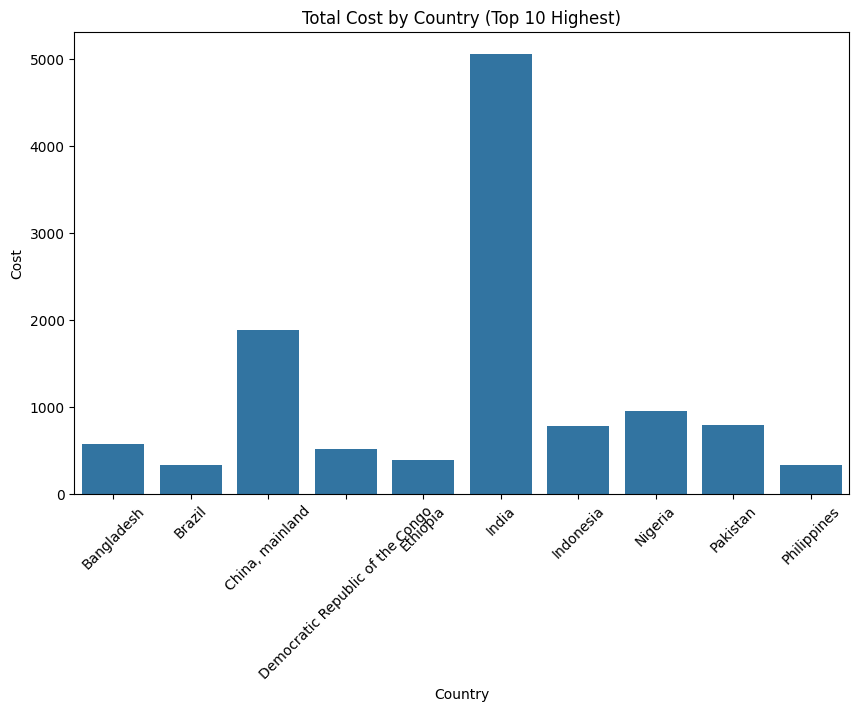

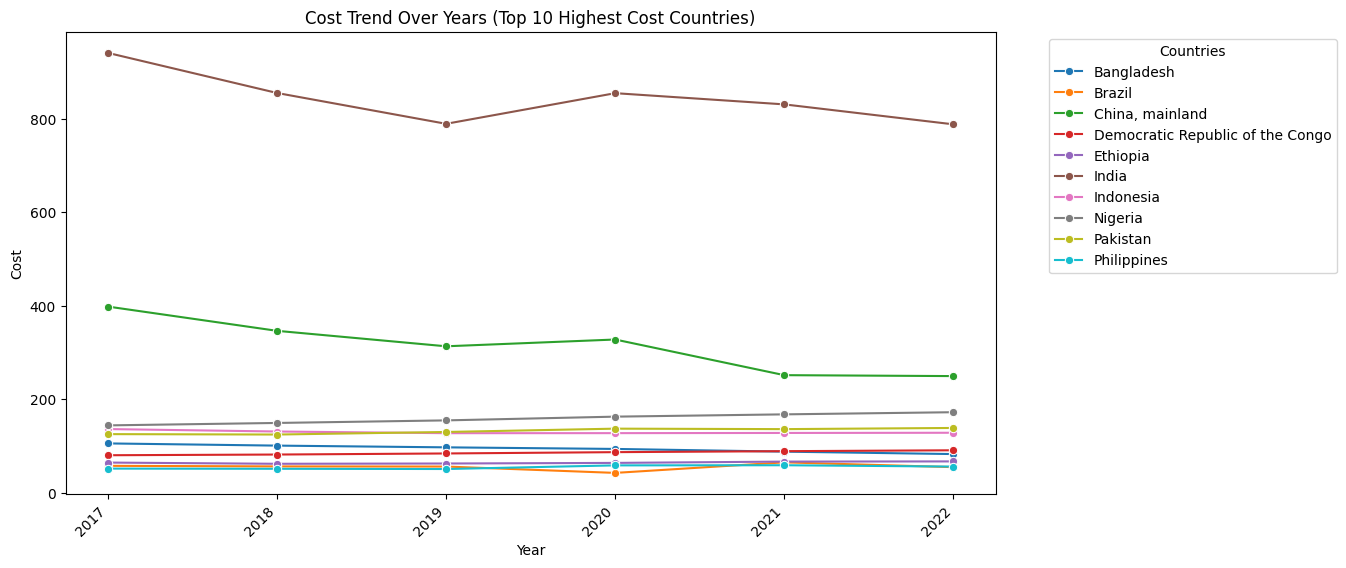

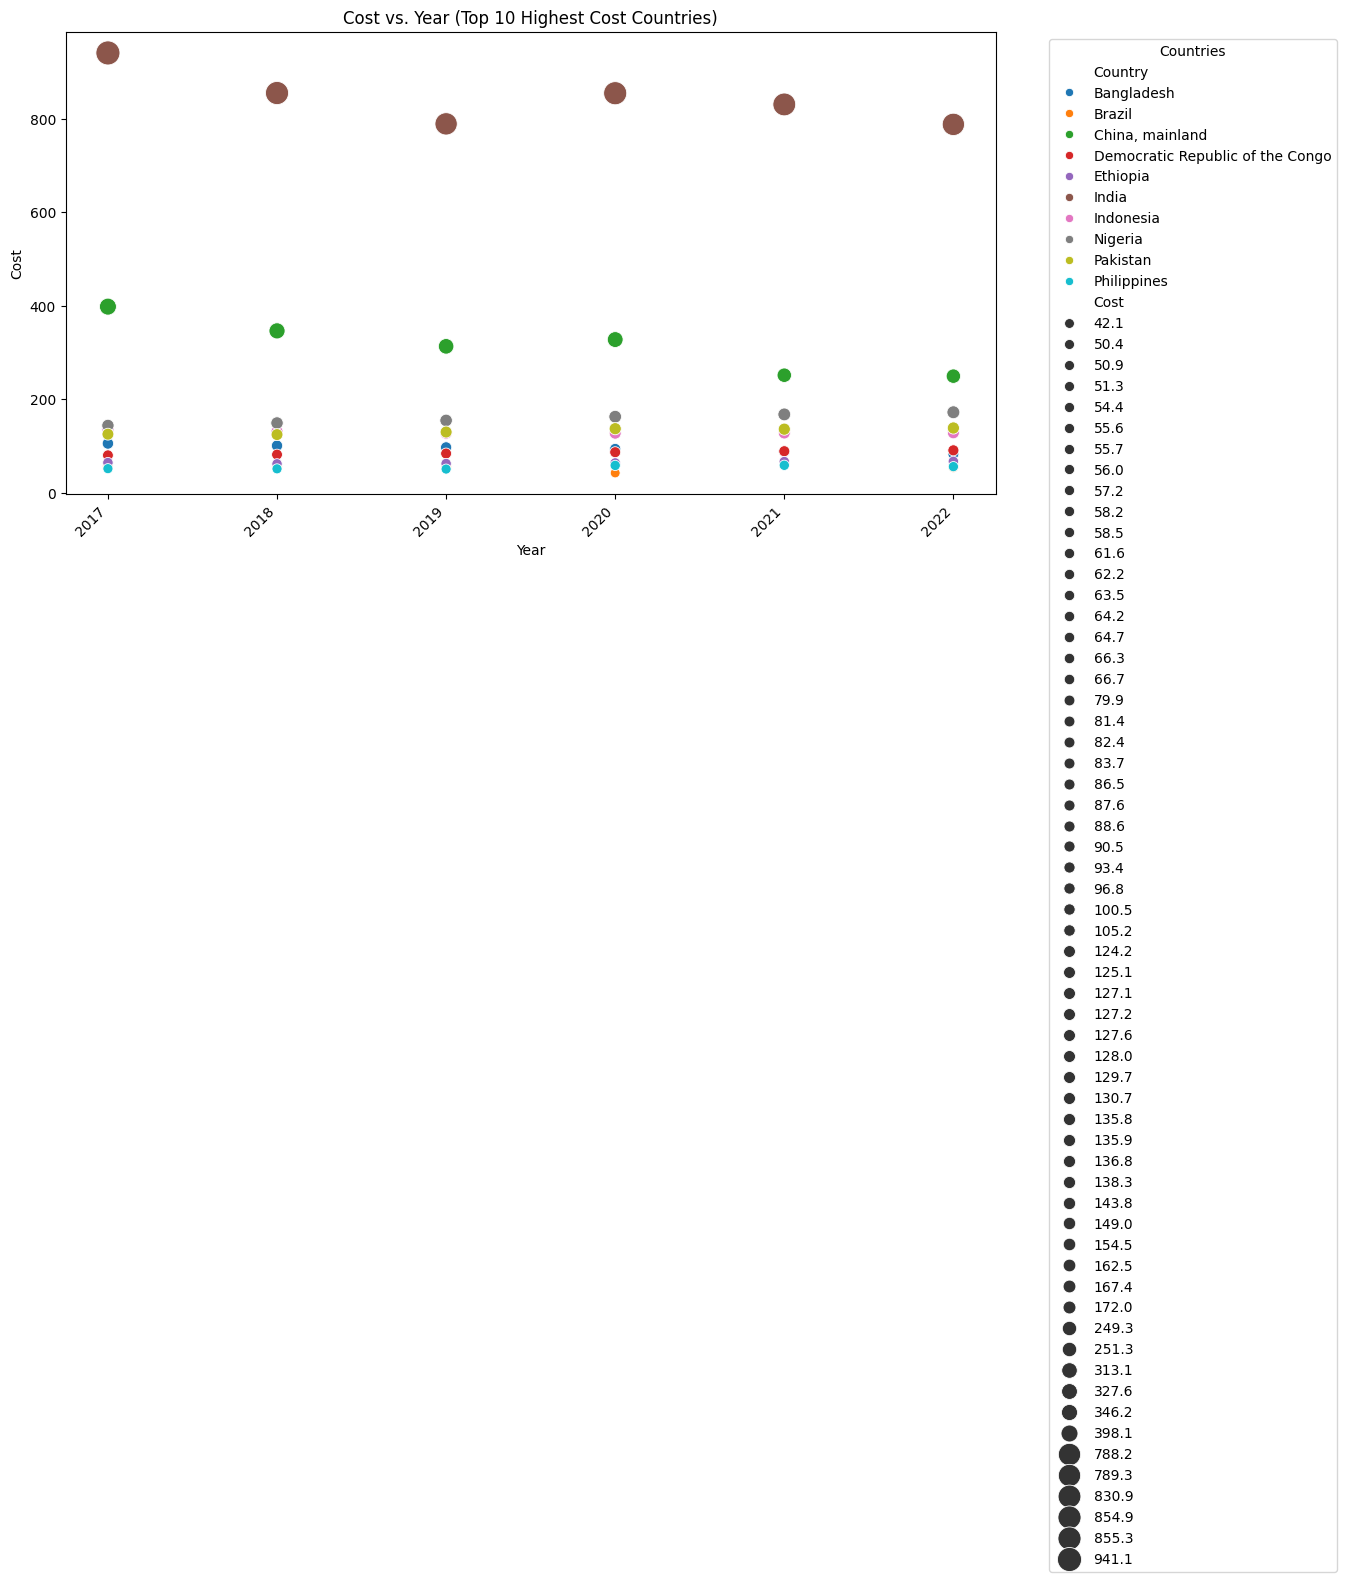

In [ ]:
from pyspark.sql.functions import split

# Check the columns in your DataFrame
print(df.columns)

# If "Country", "Year", and "Cost" already exist, skip the splitting step
if "_c0" in df.columns:
    # Split the single column "_c0" into "Country", "Year", and "Cost"
    df = df.select(
        split(df["_c0"], "\t")[0].alias("Country"),
        split(df["_c0"], "\t")[1].alias("Year"),
        split(df["_c0"], "\t")[2].alias("Cost")
    )

# Convert to Pandas DataFrame for visualization
pdf = df.toPandas()

# Ensure proper data types for visualization
pdf["Cost"] = pdf["Cost"].astype(float)
pdf["Year"] = pdf["Year"].astype(int)

# Calculate total cost by country
total_cost = pdf.groupby("Country", as_index=False).agg({"Cost": "sum"})

# Get the top 10 countries with the highest total cost
highest_cost_countries = total_cost.nlargest(10, "Cost")["Country"].tolist()

# Filter the original data for these countries
filtered_pdf = pdf[pdf["Country"].isin(highest_cost_countries)]

# Visualization

# 1. Bar Plot: Total cost by country (Top 10 Highest Cost Countries)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cost[total_cost["Country"].isin(highest_cost_countries)], x="Country", y="Cost", ci=None)
plt.title("Total Cost by Country (Top 10 Highest)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Line Plot: Cost trend over years (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels
sns.lineplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", marker="o")
plt.title("Cost Trend Over Years (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Optionally, adjust the number of countries or create a legend outside the plot
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Visualization 3: Scatter Plot: Cost vs. Year (Top 10 Highest Cost Countries)
plt.figure(figsize=(12, 6))  # Increase figure size to accommodate labels

# Scatter plot with adjusted size
sns.scatterplot(data=filtered_pdf, x="Year", y="Cost", hue="Country", size="Cost", sizes=(50, 300), legend="full")

plt.title("Cost vs. Year (Top 10 Highest Cost Countries)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the legend for country names
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



In [ ]:
# Step 1: Install Apache Hive and Hadoop in Colab (you've already done this)
!wget https://archive.apache.org/dist/hive/hive-4.0.1/apache-hive-4.0.1-bin.tar.gz
!tar -xzvf apache-hive-4.0.1-bin.tar.gz
!mv apache-hive-4.0.1-bin /usr/local/hive

# Step 2: Set Java, Hadoop, and Hive environment variables
import os

os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['HADOOP_HOME'] = '/usr/local/hadoop'
os.environ['HIVE_HOME'] = '/usr/local/hive'
os.environ['PATH'] = os.environ['PATH'] + ':/usr/local/hive/bin:/usr/local/hadoop/bin:/usr/lib/jvm/java-8-openjdk-amd64/bin'

# Step 3: Create the hive-site.xml configuration (if not already done)
hive_site_content = '''<property>
  <name>hive.metastore.warehouse.dir</name>
  <value>/user/hive/warehouse</value>
</property>
<property>
  <name>hive.exec.scratchdir</name>
  <value>/tmp/hive</value>
</property>
<property>
  <name>hive.exec.local.scratchdir</name>
  <value>/tmp/hive</value>
</property>
<property>
  <name>hadoop.tmp.dir</name>
  <value>/tmp/hadoop</value>
</property>
<property>
  <name>mapred.job.tracker</name>
  <value>localhost:9001</value>
</property>
<property>
  <name>fs.defaultFS</name>
  <value>hdfs://localhost:9000</value>
</property>
'''

# Save hive-site.xml to the correct location
hive_conf_dir = '/usr/local/hive/conf'
os.makedirs(hive_conf_dir, exist_ok=True)
with open(f'{hive_conf_dir}/hive-site.xml', 'w') as f:
    f.write(hive_site_content)

# Step 4: Verify if the environment is correctly set
print("HADOOP_HOME:", os.environ.get('HADOOP_HOME'))
print("JAVA_HOME:", os.environ.get('JAVA_HOME'))
print("HIVE_HOME:", os.environ.get('HIVE_HOME'))
print("PATH:", os.environ.get('PATH'))

# Step 5: Check if 'hive' and 'schematool' commands work
!hive --version
!schematool -version

# Step 6: Initialize schema (should be done only once)
!schematool -initSchema -dbType derby

# Step 7: Start Hive CLI (Note: This might not work in Colab due to resource limitations)
!hive


--2024-11-20 19:27:36--  https://archive.apache.org/dist/hive/hive-4.0.1/apache-hive-4.0.1-bin.tar.gz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408225272 (389M) [application/x-gzip]
Saving to: ‘apache-hive-4.0.1-bin.tar.gz’

apache-hive-4.0.1-b 100%[===================>] 389.31M  24.1MB/s    in 17s     

2024-11-20 19:27:54 (22.7 MB/s) - ‘apache-hive-4.0.1-bin.tar.gz’ saved [408225272/408225272]

apache-hive-4.0.1-bin/conf/hive-log4j2.properties.template
apache-hive-4.0.1-bin/conf/hive-exec-log4j2.properties.template
apache-hive-4.0.1-bin/conf/beeline-log4j2.properties.template
apache-hive-4.0.1-bin/conf/llap-daemon-log4j2.properties.template
apache-hive-4.0.1-bin/conf/llap-cli-log4j2.properties.template
apache-hive-4.0.1-bin/conf/parquet-logging.properties
apache-hive-4.0.1-bin/hcatalog/share/doc/h

In [ ]:
#Load the Hunger Index Data
hunger_index_file_path = "/mnt/data/2024.xlsx"  # Path to the hunger index Excel file
hunger_index_df = spark.read.format("com.crealytics.spark.excel") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(hunger_index_file_path)

Py4JJavaError: An error occurred while calling o253.load.
: org.apache.spark.SparkClassNotFoundException: [DATA_SOURCE_NOT_FOUND] Failed to find the data source: com.crealytics.spark.excel. Please find packages at `https://spark.apache.org/third-party-projects.html`.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.dataSourceNotFoundError(QueryExecutionErrors.scala:725)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:647)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:697)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:208)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:186)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.ClassNotFoundException: com.crealytics.spark.excel.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:594)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:527)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:633)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:633)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:633)
	... 15 more


In [ ]:
# Display the schema of both datasets
indicators_df.printSchema()
hunger_index_df.printSchema()

In [ ]:
#Data Preprocessing
# Drop duplicates and fill missing values for indicators dataset
indicators_df = indicators_df.dropDuplicates().na.fill(0)

In [ ]:
# Filter relevant indicators (e.g., Agricultural Yield, Malnutrition Rate, GDP Spending)
indicators_df = indicators_df.filter(col("Item").isin("Agricultural Yield", "Malnutrition Rate", "GDP Spending"))

In [ ]:
#Combine Data
# Join the indicators data with hunger index data on 'Area' and 'Year'
combined_df = indicators_df.join(hunger_index_df, ["Area", "Year"], "inner")

In [ ]:
#Exploratory Data Analysis (EDA)
# Show basic statistics
combined_df.describe().show()

In [ ]:
# Sample data for visualization
combined_pd = combined_df.sample(fraction=0.1, seed=42).toPandas()

In [ ]:
# Plotting distribution of indicator values
plt.figure(figsize=(10, 6))
sns.histplot(combined_pd['Value'], bins=30)
plt.title("Distribution of Indicator Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Mapper function to extract key data points for each region
def mapper(row):
    key = row['Area']
    value = {
        'Agricultural_Yield': row['Agricultural_Yield'],
        'Malnutrition_Rate': row['Malnutrition_Rate'],
        'GDP_Spending': row['GDP_Spending'],
        'Count': 1  # Track the count for averaging
    }
    return (key, value)

In [ ]:
# Reducer function to aggregate data and compute averages for each region
def reducer(key, values):
    total_yield, total_malnutrition, total_gdp, count = 0, 0, 0, 0

    # Summing up all values for each indicator
    for val in values:
        total_yield += val['Agricultural_Yield']
        total_malnutrition += val['Malnutrition_Rate']
        total_gdp += val['GDP_Spending']
        count += val['Count']

    # Compute averages
    avg_yield = total_yield / count if count else 0
    avg_malnutrition = total_malnutrition / count if count else 0
    avg_gdp_spending = total_gdp / count if count else 0

    # Return aggregated metrics
    return (key, {
        'Avg_Yield': avg_yield,
        'Avg_Malnutrition': avg_malnutrition,
        'Avg_GDP_Spending': avg_gdp_spending
    })

In [ ]:
# Apply MapReduce on the DataFrame
# Convert DataFrame to RDD for MapReduce operations
rdd = combined_df.rdd.map(mapper).groupByKey().mapValues(list).map(lambda x: reducer(x[0], x[1]))

In [ ]:
# Collect results and convert RDD back to DataFrame for further analysis
trends_metrics = rdd.collect()
trends_df = spark.createDataFrame(trends_metrics, schema=["Region", "Metrics"])


In [ ]:
# Show the results of MapReduce
trends_df.show(truncate=False)

In [ ]:
#Correlation Analysis
# Calculate correlation coefficients between hunger index and key socioeconomic indicators
correlations = combined_df.select(
    corr("Hunger_Index", "Agricultural_Yield").alias("Hunger_Agri_Yield"),
    corr("Hunger_Index", "Malnutrition_Rate").alias("Hunger_Malnutrition"),
    corr("Hunger_Index", "GDP_Spending").alias("Hunger_GDP_Spending")
)

correlations.show()

In [ ]:
#Predictive Modeling (Optional)
# Prepare data for regression analysis
assembler = VectorAssembler(inputCols=["Agricultural_Yield", "Malnutrition_Rate", "GDP_Spending"], outputCol="features")
data = assembler.transform(combined_df.select("features", col("Hunger_Index").alias("label")))


In [ ]:
# Train a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="label")
model = lr.fit(data)
predictions = model.transform(data)
predictions.select("features", "label", "prediction").show()

In [ ]:
#Data Visualization
# Visualize Hunger Hotspots by Region
hotspot_data = combined_df.groupBy("Area").agg(avg("Hunger_Index").alias("Avg_Hunger_Index")).toPandas()


In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Area", y="Avg_Hunger_Index", data=hotspot_data)
plt.xticks(rotation=90)
plt.title("Hunger Hotspots by Region")
plt.xlabel("Region")
plt.ylabel("Average Hunger Index")
plt.show()

In [ ]:
# Scatter plot to visualize correlation between GDP Spending and Hunger Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_pd["GDP_Spending"], y=combined_pd["Hunger_Index"])
plt.title("Correlation between GDP Spending and Hunger Index")
plt.xlabel("GDP Spending on Agriculture")
plt.ylabel("Hunger Index")
plt.show()

In [ ]:
# Step 1: Download and install Hadoop and Hive
!wget https://downloads.apache.org/hive/hive-4.0.1/apache-hive-4.0.1-bin.tar.gz
!tar -xzvf apache-hive-4.0.1-bin.tar.gz
!mv apache-hive-4.0.1-bin /usr/local/hive

# Set up necessary environment variables and paths for Hadoop and Hive
!export HADOOP_HOME=/usr/local/hadoop
!export HIVE_HOME=/usr/local/hive
!export PATH=$PATH:$HADOOP_HOME/bin:$HIVE_HOME/bin

# Create necessary directories for Hive configuration
!mkdir -p /tmp/hive
!mkdir -p /user/hive/warehouse

# Step 2: Configure Hive by setting environment variables
!export HIVE_CONF_DIR=/usr/local/hive/conf

# Step 3: Run Hive to confirm installation
!/usr/local/hive/bin/hive --version


In [ ]:
# Verify Hadoop installation
!$HADOOP_HOME/bin/hadoop version

In [ ]:
!mkdir -p /usr/local/hive/conf

hive_site_content = """
<configuration>
    <property>
        <name>javax.jdo.option.ConnectionURL</name>
        <value>jdbc:derby:;databaseName=metastore_db;create=true</value>
        <description>JDBC connect string for a JDBC metastore</description>
    </property>
    <property>
        <name>hive.metastore.warehouse.dir</name>
        <value>/user/hive/warehouse</value>
        <description>Location of default database for the warehouse</description>
    </property>
</configuration>
"""

hive_site_path = "/usr/local/hive/conf/hive-site.xml"
with open(hive_site_path, "w") as file:
    file.write(hive_site_content)

print("Hive configuration file created.")



In [ ]:
!cat /usr/local/hive/conf/hive-site.xml
